# Predicting Churn in Telecommunication Customers
# Phase 2: Predictive Modelling

By Harold Davies

## Table of Contents
* [Introduction](#intro)
  + [Phase 1 Summary](#Phase-1-Summary)
  + [Report Overview](#Report-Overview)
  + [Overview of Methodology](#Overview-of-Methodology)
* [Predictive Modelling](#Predictive-Modelling)
  + [Feature Selection](#Feature-Selection)
  + [Model Fitting & Tuning](#Model-Fitting-&-Tuning)
    + [Neural Network Model Fitting & Tuning](#Neural-Network-Model-Fitting-&-Tuning)
  + [Model Comparison](#Model-Comparison)
* [Critique & Limitations](#Critique-&-Limitations)
* [Summary & Conclusions](#Summary-&-Conclusions)
  + [Project Summary](#Project-Summary)
  + [Summary of Findings](#Summary-of-Findings)
  + [Conclusions](#Conclusions)


## Introduction <a id='intro'></a>

The goal of this project is to use the cleaned telecommunication customer churn dataset from phase 1 to train and test machine learning models, identifying the model with the best capability to predict customers who will churn, based on similar unseen data. The introduction of the project will be broken into three segments: phase 1 summary, report overview and overview of methodology. 

### Phase 1 Summary

#### Dataset

The original dataset from CrowdAnalytix contained 21 features, however four features had been removed from the dataset on GitHub, where the data was shared by Kumar in 2019 and where the data for this project was sourced. At the beginning of the first phase of the project, after the removal of phone numbers, the dataset contained 16 features and 3,333 individual customers. 

#### Data Cleaning

During data cleaning the area code and state columns were also removed from the data to reduce noise, then columns were renamed for clarity and data types were adjusted so that binary variables (internation plan, voicemail plan and churn) became integer values of 0 or 1. Missing values were identified and analysed, the correct value of one was able to be determined whilst the rest were removed via the deletion of 17 rows. Data preprocessing was finalised by removing the voice mail plan column as it was determined to be redundant. These actions were all specifically aimed at ensuring the data is ready to be used to train models in phase 2 of the report, and that the models will produce as accurate predictions as possible. 

#### Visualisations

Phase 1 of this project also involved using a variety of visualisation to explore the data to ensure it is appropriately filtered and processed and to grasp a thorough understanding of the data. Single variable visualisations showed that account age has an extremely normal distribution, and the number of customer service calls is heavily right skewed with many outliers. The bi-variate plots showed that the distribution of number of international calls between people who do and do not have international plans, is extremely similar, whilst number of day calls compared to number of night calls, and number of evening calls compared to sum of evening charges, show no signs of correlation. When we dug deeper into international calls by comparing number of calls with sum of charges overlayed with whether the customer has an international plan, we discovered that those with international plans had tighter ranges of charges. Some other interesting trends discovered from multi-variate plots were that as number of service calls increases, the proportion of customers who are churners significantly increases and the sum of day charges is a strong indicator of who will churn, especially at the high end of charges. Some important takeaways from the visualisation process were the lack of correlation between almost all the features, the presence of correlation between voicemail plan and number of voicemails, the imbalances in binary features and the higher significance of some features. These findings will all be very relevant to the methodology outlined below and the performance of the models described. 

### Report Overview

Phase 2 of this project involves a thorough and intentionally planned sequence of tasks aimed at producing trained machine learning models with the highest possible capability to predict which customers will churn based on unseen observations with the same set of features. The process first requires the dataset from phase 1 be imported and scaled, so that all features have the same value ranges and then split into the feature set and target values. Following from that, a feature selection process is used to identify a subset of the features which may produce similar or higher model accuracy whilst optimising computational requirements and model simplicity. After the number of features has been reduced, the data is split into train and test data and 4 models are tuned on the training data with visualisations utilised to explore, better understand and critique the parameter tuning process. Once a tuned set of models has been established, they are compared to determine the statistical significance of differences in model performance, and finally, tested on the test dataset. The project is closed out by critiquing the process which has been followed, discussing project limitations and summarising the findings and conclusions of the report. 

### Overview of Methodology

#### Preparation

The predictive modelling process began by setting a random seed to ensure the consistency of results throughout the projects completion, setting of an accuracy metric which all of the modelling processes will be based upon, importing the dataset, scaling features and noting binary feature imbalances. 

The accuracy method selected was area under the ROC curve (AUC). AUC is a very effective metric for binary classification problems which accounts for imbalances in the target feature, an essential feature in our project as only 14.4% of all customers are churners. It does this by taking into account the rate of true positives and false positives across different threshold values, which makes it a more comprehensive measure of model performance compared to metrics that rely on a single threshold. Thanks to AUC's focus on optimising model performance across the range of possible threshold values, if it is determined that the cutoff value can be adjusted in order to optimise model performance, this could potentially be leveraged in order to achieve higher recall. By defining the scoring metric at the beginning of the project and using it throughout, we are also ensuring consistency, comparability and optimal model performance. 

When scaling the data, a min-max scaler was used to bring all the values to between 0 and 1, and the scaling model was retained inside a variable so that it could be used, if necessary, to scale unseen data in future to be inputted into the best model and churn predictions obtained. 

The balance of binary features was displayed so that after a train test split is performed later in the project, we can ensure that the train and test datasets have a representative sample of customers from across the distributions of these features. 

#### Feature Selection

Feature selection was carried out utilising Random Forest Importances. This involved selecting a wrapper model and cross validation procedure, measuring the wrapper's performance on the full feature set, fitting a random forest to the data, extracting feature importances, training and evaluating the wrapper model on various subsets of the best features and meaningfully comparing their performances. 

Honestly, initially, a different method was explored for feature selection, and the truth is, that method may have produces better results, but ultimately, random forest importances were selected for this project due to their wide acceptance as an effective means of selecting features and the simplicity of the process involved in using them. Limitations of this methodology will be discussed in the appropriate section later in the report. Again, a decision tree was selected for use as wrapper for its simplicity and computational efficiency, the decision tree wrapper's max depth was tuned, though this was not shown in the report outputs. 

For cross validation (CV), 5 fold stratified CV with 3 repeats was used to enhance comparability of results and management of class imbalances. Feature importances were displayed as a bar chart to show their distribution and order. Thanks to the simplicity of the wrapper and small number of features it was easy to evaluate the AUC score of every possible number of features and results were visualised. Paired t-tests were used to compare the significance of differences in results between different sets of features. 

The final step of feature selection was to drop the columns which were not selected to be used for modelling. 

#### Model Fitting and Tuning

Fitting and tuning required the data to be split into train and test sets, the remaining binary variable (after feature selection) to be checked for distribution consistency across the sets, logistic regression, K Nearest Neighbours, Random Forest and neural network models to be tuned and explored to select a set of models for further comparison, significance of the results to be considered and finally the selected models were trained on the entire training set and tested on the test dataset. 

In the train test split, 30% of the data was partitioned for testing and stratification was used to ensure consistent target distributions across the split. When tuning the models, grid searches were utilised to experiment with a vast quantity of model parameters at once, allowing for comparison of the performance of models utilising every possible combination of hyperparameters. Each model was researched in conjunction with the application of churn prediction to gain an appreciation of the most appropriate parameters so that an exhaustive tuning process could be undertaken, and results of each parameter tuning process were visualised to further understand and explore the performance of models based on different algorithms, co-efficients and parameters such as number of neighbours and maximum model iterations. 

The tuning process was carried out entirely on the training data utilising stratified 5-fold CV in an attempt to minimise overfitting, avoid data leakage but also optimise computational requirements by avoiding use of repeats. Once an exhaustive, iterative grid search process had identified the highest performing model, the grid parameters were modified to capture an interesting set of parameters and results for visualisation. Visualisation of model results often instigated re-iteration of the grid search process to further explore the impact of model parameters on model performance and identify the best models for later comparison. 

When comparing the best models, a more vigorous CV method was used with 5 folds and 5 repeats to obtain more conclusive significance findings from paired t-testing. Finally, each selected model was fitted to the full training dataset to achieve the best possible generalisation and tested on the test set. 

## Predictive Modelling

First up we need to import libraries, configure some display settings, set a random seed, set the scoring metric and load our cleaned dataset in from file. 

In [1]:
#much of the code in this workbook has been adapted from Dr Akman's ml_tutorials github repository: https://github.com/akmand/ml_tutorials
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from scipy import stats                                 #t-tests
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier         #for FS wrapper
from sklearn.ensemble import RandomForestClassifier     #for FS & model 3
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression     #model 1
from sklearn.neighbors import KNeighborsClassifier      #model 2
from sklearn.neural_network import MLPClassifier        #model 4
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
import seaborn as sns

#I will use this random seed throughout the project
rand = 99

#using AUC - accuracy would be a poor choice here due to class imbalance
scoring_metric = 'roc_auc'

#import the clean dataset
df = pd.read_csv('clean_data.csv')
df.head()

,account_age,intl_plan,voice_mail_plan,n_voice_mails,n_day_calls,sum_day_charges,n_evening_calls,sum_evening_charges,n_night_calls,sum_night_charges,n_intl_calls,sum_intl_charges,n_customer_service_calls,churn
0,128,0,1,25.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,0
1,107,0,1,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,0
2,137,0,0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,0
3,84,1,0,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,2.0,0
4,75,1,0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,0


As we can see above, the features have not been scaled, which will be necessary as some of the models used in this project (such as RFI) are sensitive to feature scaling. Let's scale the features so that they have consistent value ranges. The scaling model used here could also be used later, on unseen data, in order to use the same classification models trained in this project, to make classification predictions on unseen data. 

In [2]:
#create backup copy to save column names
backup_df = df.copy()
#set scaling model
Data_scaler = preprocessing.MinMaxScaler()
#fit scaling model to our dataset
Data_scaler.fit(df)
#apply scaling model to our dataset
#   scaling model could be used to transform unseeen data 
#   for predictions using the predicition models later developed in this project
df = Data_scaler.fit_transform(df)
#let's save the data as a data frame with the column titles
df = pd.DataFrame(df, columns=backup_df.columns)
#and take a look at a sample
df.sample(8, random_state=rand)

,account_age,intl_plan,voice_mail_plan,n_voice_mails,n_day_calls,sum_day_charges,n_evening_calls,sum_evening_charges,n_night_calls,sum_night_charges,n_intl_calls,sum_intl_charges,n_customer_service_calls,churn
751,0.433884,0.0,0.0,0.000000,0.630303,0.533367,0.688235,0.688127,0.338028,0.327555,0.15,0.550000,0.111111,0.0
438,0.243802,0.0,0.0,0.000000,0.533333,0.279846,0.405882,0.496280,0.253521,0.539151,0.10,0.464815,0.222222,0.0
3080,0.380165,0.0,0.0,0.000000,0.733333,0.511737,0.770588,0.527661,0.647887,0.383144,0.20,0.600000,0.000000,0.0
2715,0.648760,0.0,0.0,0.000000,0.690909,0.491449,0.405882,0.705597,0.500000,0.570831,0.00,0.000000,0.222222,0.0
1347,0.665289,0.0,0.0,0.000000,0.715152,0.525989,0.558824,0.615982,0.345070,0.423192,0.15,0.579630,0.111111,0.0
1873,0.599174,0.0,0.0,0.000000,0.612121,0.585513,0.452941,0.371077,0.352113,0.772863,0.10,0.514815,0.333333,0.0
762,0.438017,1.0,0.0,0.000000,0.630303,0.779678,0.400000,0.505338,0.239437,0.351464,0.45,0.550000,0.222222,0.0
780,0.553719,0.0,1.0,0.431373,0.684848,0.561871,0.558824,0.713361,0.718310,0.300060,0.25,0.729630,0.222222,0.0


The remainder of the project will require the data to be split into feature variables (the 13 features which describe each telecom customer) and a target variable (whether the customer churns). It is important to note that non-churners are encoded as a 0 value (i.e. False or negative) in the target feature and churners are encoded as a 1 (i.e. True or positive). 

In [3]:
#split into feature variables (Data) and target
Data = df.drop(columns = 'churn').values
target = df['churn']
target.value_counts(normalize=True)

churn
0.0    0.856109
1.0    0.143891
Name: proportion, dtype: float64

We also note here the class imbalance present in the target values as well as in other binary features

In [4]:
df['intl_plan'].value_counts(normalize=True)

intl_plan
0.0    0.903167
1.0    0.096833
Name: proportion, dtype: float64

In [5]:
df['voice_mail_plan'].value_counts(normalize=True)

voice_mail_plan
0.0    0.723379
1.0    0.276621
Name: proportion, dtype: float64

### Feature Selection (FS)

Although 13 features are not a huge amount of features to work with, it is possible that some of the features add little value to models' ability to make predictions, they may even confuse the models, making predictions worse, therefore it is necessary to carry out a feature selection process. We will use the random forest importance feature selection method with 100 estimators (decision trees) to select the best n features for a range of n values, and compare the performance of a decision tree classifier with a max depth of 5 on each set of features. To evaluate the performance of the decision trees we will use repeated stratified cross validation with 5 folds and 3 repeats, and the area under the ROC curve scoring metric. 

In [6]:
#let's look at performance of a decision tree wrapper using a max depth of 6 and all 13 features
clf_dt = DecisionTreeClassifier(max_depth=5, random_state=rand)

#repeated stratified k fold cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=rand)

cv_results_full = cross_val_score(  estimator=clf_dt,
                                    X=Data,
                                    y=target, 
                                    cv=cv_method, 
                                    scoring=scoring_metric)
cv_results_full_mean = cv_results_full.mean().round(3)
cv_results_full_mean

0.883

This is the score (outputted above) that the decision tree wrapper achieved on the entire feature set which we will compare with equivalent scores on smaller feature sets, chosen using the random forest importance feature selection method. The full set of results are 15 values (5 folds x 3 repeats) which are stored in the cv_results_full variable, we can use this variable later to determine the significance of differences in results using different feature sets. 

Next we will define a function for plotting feature importances and have a look at the importances of features according to RFI. 

In [7]:
#plot for feature importances
def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

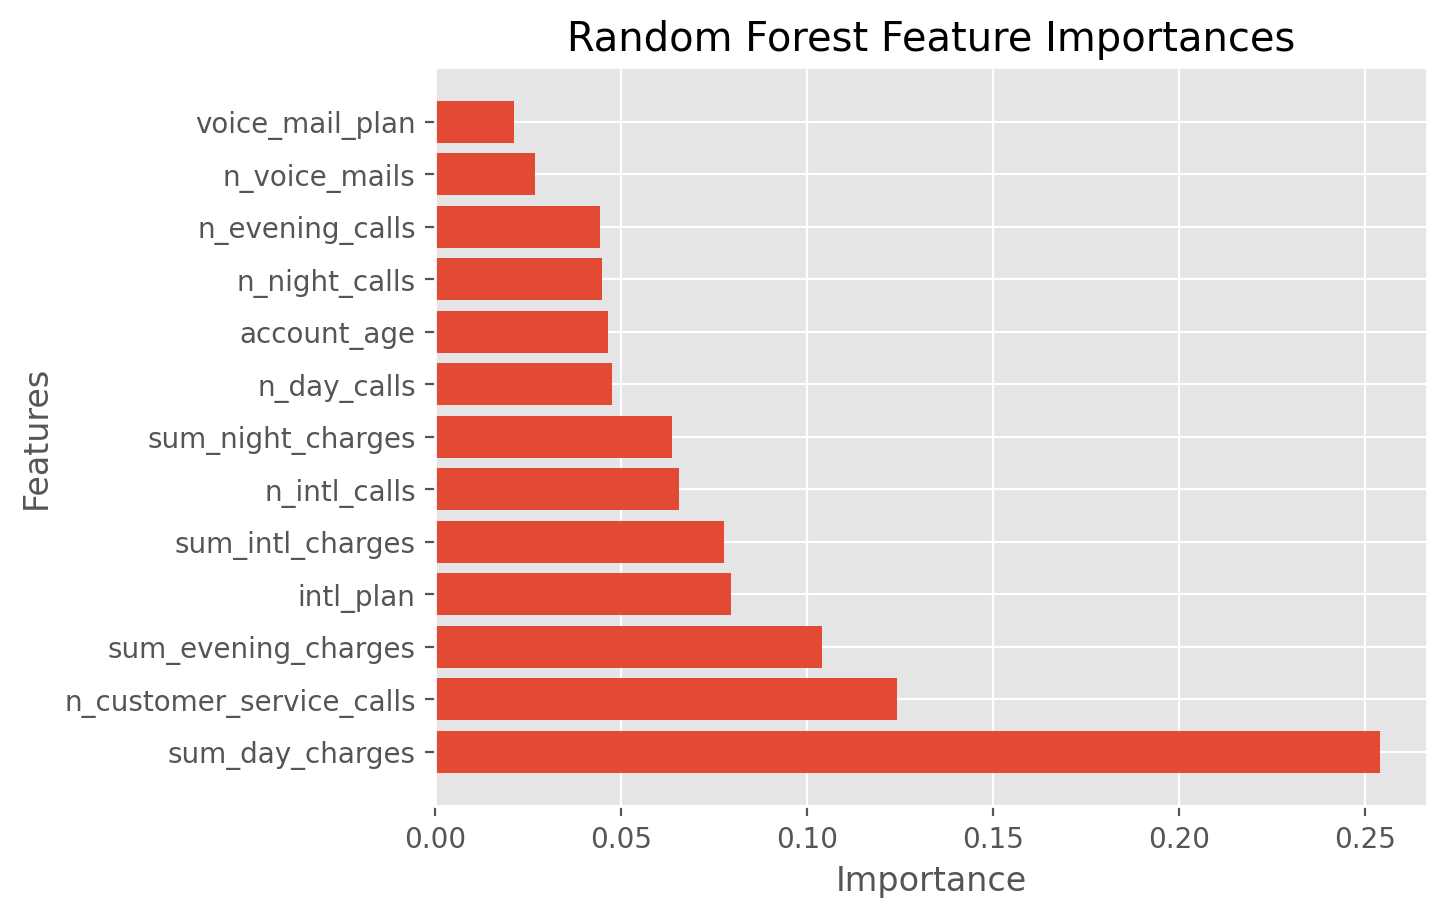

In [8]:
#set the model for calculation of feature importances
model_rfi = RandomForestClassifier(n_estimators=100, random_state=rand)

#fit the model to the data
model_rfi.fit(Data, target)

#save importance values
feature_importances_rfi = model_rfi.feature_importances_

#order indices of features in order of importance
sorted_indices = np.argsort(feature_importances_rfi)[::-1]
sorted_importances = feature_importances_rfi[sorted_indices]

#retrieve feature names correlating with above indices (and their order)
best_features_rfi = df.columns[sorted_indices].values

#plot the importance values of each feature according the the RF model importances
plot_imp(best_features_rfi, sorted_importances, 'Random Forest')

We can see there are no null values produced by the RFI method, and the most important features are sum_day_charges, n_customer_service_calls and sum_evening_calls. Now let's look at the wrapper's performance on different sized feature sets. 

In [9]:
#generate list of possible numebrs of features
num_features_list = list(range(1, Data.shape[1]))

#initiate list for sets of results
result_sets = {}

#initiate list for average results for each feature set
result_means = []

#for each n number of features, perform CV on the top n features, saving sets and averages of results
for num_features in num_features_list:
    fs_indices_rfi = sorted_indices[0:num_features]
    best_features_rfi = df.columns[fs_indices_rfi].values
    feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
    cv_results_rfi = cross_val_score(estimator=clf_dt,
                                X=Data[:, fs_indices_rfi],
                                y=target, 
                                cv=cv_method, 
                                scoring=scoring_metric)
    result_sets[f'{num_features}_features'] = cv_results_rfi
    result_means.append(cv_results_rfi.mean().round(3))

#print average score results
for index, num_features in enumerate(num_features_list):
    print(f'Mean {scoring_metric} score with {num_features} features: {result_means[index]}:')

#print the score using all features
print(f'Mean {scoring_metric} score with full feature set: {cv_results_full_mean}')

Mean roc_auc score with 1 features: 0.683:
Mean roc_auc score with 2 features: 0.783:
Mean roc_auc score with 3 features: 0.787:
Mean roc_auc score with 4 features: 0.857:
Mean roc_auc score with 5 features: 0.865:
Mean roc_auc score with 6 features: 0.874:
Mean roc_auc score with 7 features: 0.874:
Mean roc_auc score with 8 features: 0.873:
Mean roc_auc score with 9 features: 0.873:
Mean roc_auc score with 10 features: 0.871:
Mean roc_auc score with 11 features: 0.867:
Mean roc_auc score with 12 features: 0.881:
Mean roc_auc score with full feature set: 0.883


These are some pretty incredible results, the decision tree model can correctly classify more than 2/3 of customers using just sum_day_charges! Let's make the results easier to look at. 

In [10]:
#append the results for the full feature set to our lists
num_features_list.append(13)
result_means.append(cv_results_full_mean)

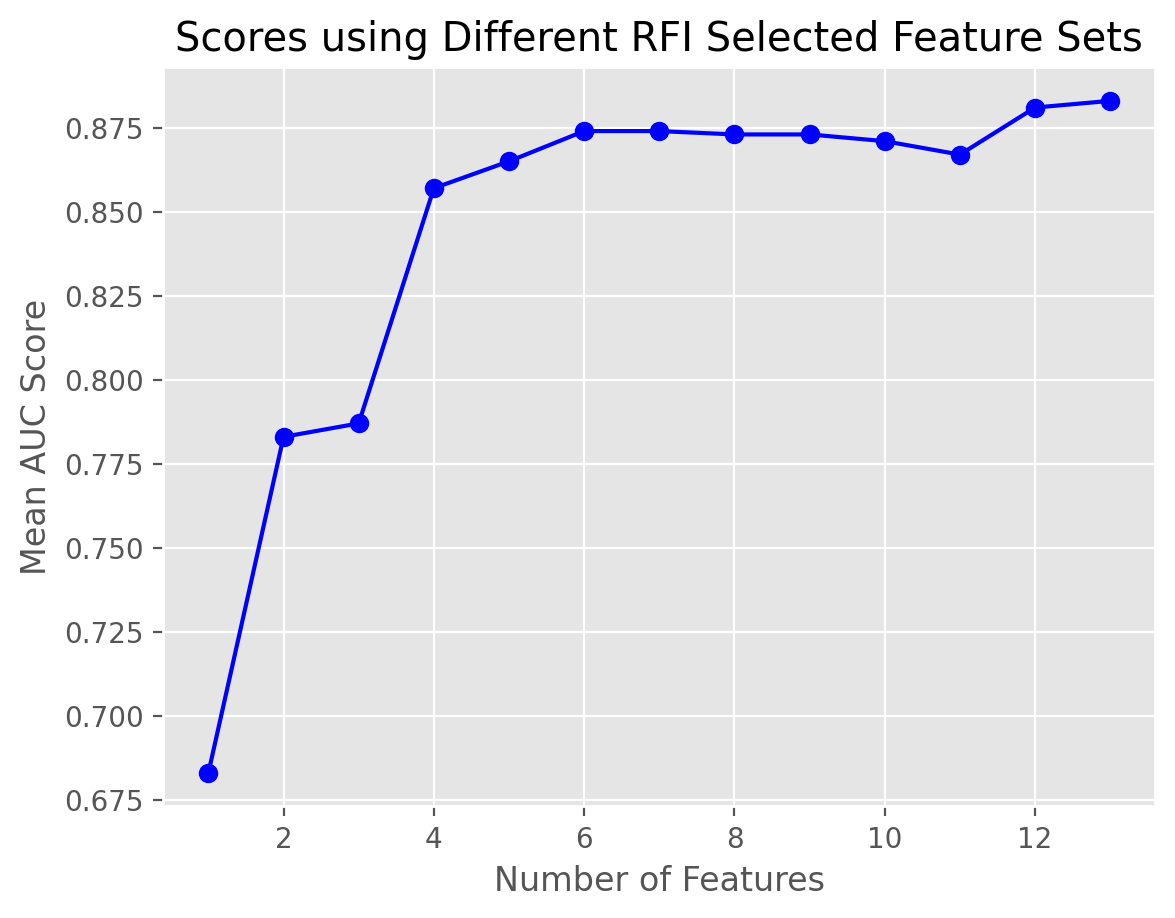

In [11]:
#plot feature selection results
plt.plot(num_features_list, result_means, marker='o', linestyle='-', color='b')
plt.title('Scores using Different RFI Selected Feature Sets')
plt.xlabel('Number of Features')
plt.ylabel('Mean AUC Score')
plt.grid(True)
plt.show()

Once the DT wrapper model has at least the 6 most important features to work with, it can achieve around 87.5% AUC based on our cross validation technique. Let's have a look at the significance of these results.  

In [12]:
#t-testing best spFSR results against other feature set results
for key, value_list in result_sets.items():
    # print()
    p = stats.ttest_rel(result_sets['6_features'], value_list).pvalue.round(3)
    print(f"p value for results of 6 features Vs results of {key}: {p}")

p value for results of 6 features Vs results of 1_features: 0.0
p value for results of 6 features Vs results of 2_features: 0.0
p value for results of 6 features Vs results of 3_features: 0.0
p value for results of 6 features Vs results of 4_features: 0.009
p value for results of 6 features Vs results of 5_features: 0.021
p value for results of 6 features Vs results of 6_features: nan
p value for results of 6 features Vs results of 7_features: 0.988
p value for results of 6 features Vs results of 8_features: 0.766
p value for results of 6 features Vs results of 9_features: 0.737
p value for results of 6 features Vs results of 10_features: 0.415
p value for results of 6 features Vs results of 11_features: 0.191
p value for results of 6 features Vs results of 12_features: 0.184


From the results shown above, we can see that using 6 features results in statistically significantly better results (based on 0.05 statistical significance level and our cross validation technique) than any smaller feature set selected based on RFI, and that the differences in results from using more features are not statistically significant. Therefore, in order to maximise model accuracy whilst balancing that with model simplicity for the sake of model explainability, computational requirements and model speed, we will select the 6 features with highest RFI to use from here onwards in the project. 

It should be noted that there may be other significantly higher performing feature sets for each of the models used in this project, this is only the highest performing feature set according to RFI with a decision tree wrapper and other metrics such as the random seed and cross validation method used. It may be worth experimenting with more complex feature selection methods in order to achieve the highest performing model for a real world use case, however this feature selection process is deemed comprehensive enough for this project. Some important shortcomings of the RFI method of feature selection relevant to this dataset include its bias toward correlated features, poor explainability, instability which makes it vulnerable to minor changes including the random seed and sensitivity to hyperparameters. 

Now let's update our feature set and move forward with modelling!

In [13]:
#retrieve list of feature names to retain
columns_to_keep = df.columns[sorted_indices[0:6]].values
#update dataset features with only these columns
Data = df.loc[:, columns_to_keep].values

### Model Fitting & Tuning

To begin the modelling process, we need to carry out a train test split of the data to ensure we retain a portion (30%) of the observations which the models will not get to see until after their parameters have been tuned and we want to measure the performance of the trained models on unseen data. It is important that we use stratification as there is imbalance in the target features (far less churners than non-churners), as noted during the data exploration phase of this project. 

During the processes of tuning the models, I will only make use of the training data, selecting hyperparameters based on (k-fold) cross validation performed on the training data. Once the models have all been tuned, I will evaluate the tuned models using a more rigorous (repeated k-fold) cross validation method, also on the training data. Only once I have selected the highest performing model will I evaluate the model on the test dataset to determine its performance on unseen data, as running multiple models on the test dataset can lead to overfitting, meaning that although high performance was achieved using the test dataset, the model will not generalise well, leading to poorer performance on data not from the original dataset.  

In [14]:
#train test split
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    stratify=target,
                                                    random_state=rand)

As we have retained one binary categorical variable in the feature set, intl_plan, let's check the distribution of this variable across the training and test datasets to ensure we have reasonably consistent balances of the variable which will allow the models to generalise across the datasets. 

In [15]:
#checking the intl_plan column index - it's 3
df.loc[:, columns_to_keep].head(2)

,sum_day_charges,n_customer_service_calls,sum_evening_charges,intl_plan,sum_intl_charges,n_intl_calls
0,0.755701,0.111111,0.542866,0.0,0.500000,0.15
1,0.460597,0.111111,0.537690,0.0,0.685185,0.15


In [16]:
binary_column_index = 3

#save distributions
train_binary_dist = np.unique(D_train[:, binary_column_index], return_counts=True)
test_binary_dist = np.unique(D_test[:, binary_column_index], return_counts=True)

#convert counts to proportions
train_binary_dist = train_binary_dist[1] / D_train.shape[0]
test_binary_dist = test_binary_dist[1] / D_test.shape[0]

print("Training set binary column distribution:")
print(train_binary_dist)

print("\nTest set binary column distribution:")
print(test_binary_dist)

Training set binary column distribution:
[0.9 0.1]

Test set binary column distribution:
[0.91055276 0.08944724]


#### Logistic Regression

Next we will utilise a variety of logistic regression models in order to identify the highest performing logistic regression model. There are several parameters which can be trialled using a grid search, I will discuss each of them below. 

Penalty and C both relate to the regularisation of the model, they control the models ability to filter out irrelevant or correlated features and balance overfitting and underfitting. The options for penalty include l1 (Lasso Regularisation) and l2 (Ridge Regularisation). L1 has the ability to effectively perform feature selection and is effective at identifying one of a group of correlated features, or filtering out unimportant features. L2 on the other hand cannot filter out features so is better suited to less sparse feature sets and is effective when there are many correlated features. One could theorize that L2 regularisation should perform better on our dataset as the features have been proven to be uncorrelated and highly significant, with only the 6 most significant features being used for modelling. The C parameter controls the strength of regularisation, with lower values causing stronger regularisation which protects against overfitting but may lead to underfitting, and visa-versa. In addition to l1 and l2, the elasticnet option combines the two regularisation methods, allowing for sparse solutions while also encouraging grouped selection of correlated features, while the none option specifies no use of regularisation, as if C was equal to 0. 

Solver determines what algorithm is used to optimise the logistic regression cost function. Options include liblinear which is most suitable for small datasets with few features, saga which is a more efficient algorithm to use for larger datasets and lbfgs which is an optimisation algorithm which can handle non-linear regularisation terms. Given the low number of features selected for modelling, the liblinear algorithm may be a likely candidate for the best model algorithm. 

Max_iter specifies the maximum number of iterations allowed for the algorithm to use to converge on the optimised coefficient values, lower values of max_iter will result in faster models, but higher values may be required to achieve the desired level of performance when using complex models. 

Finally, class_weight adjusts weights of classes to account for imbalance when it is set to 'balanced' or leaves weights equal if it is set to None. Given the highly imbalanced nature of our target feature, you would expect balanced class weightings to improve the performance of the model. 

In [17]:
#define set of parameters to trial
param_grid_reg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [2, 4, 5, 6, 8, 10, 25, 30],
    'class_weight': [None, 'balanced']
}

#configure cross validation
cv_reg = StratifiedKFold(n_splits=5, shuffle=True, random_state=rand)

#configure the grid search
gs_reg = GridSearchCV(LogisticRegression(random_state=rand), 
                      param_grid_reg, cv=cv_reg, 
                      scoring=scoring_metric, n_jobs=-2, verbose=1)

#fit GridSearchCV to the data
gs_reg.fit(D_train, t_train)

#save the best parameters and score
best_params = gs_reg.best_params_
best_score = gs_reg.best_score_

#output the best parameters and best score
print(f"Best parameters: {best_params}")
print(f"Best {scoring_metric} Score: {best_score:.4f}")

#output the best model for later evaluation
gs_reg.best_estimator_

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 5, 'penalty': 'l2', 'solver': 'saga'}
Best roc_auc Score: 0.8322


LogisticRegression(C=0.01, class_weight='balanced', max_iter=5, random_state=99,
                   solver='saga')

In [18]:
#save model for later evaluation - leave RS=99, if rand changes best model changes too
best_reg_pre_conv = LogisticRegression(C=0.01, class_weight='balanced', 
                                        max_iter=5, random_state=99,
                                        solver='saga')

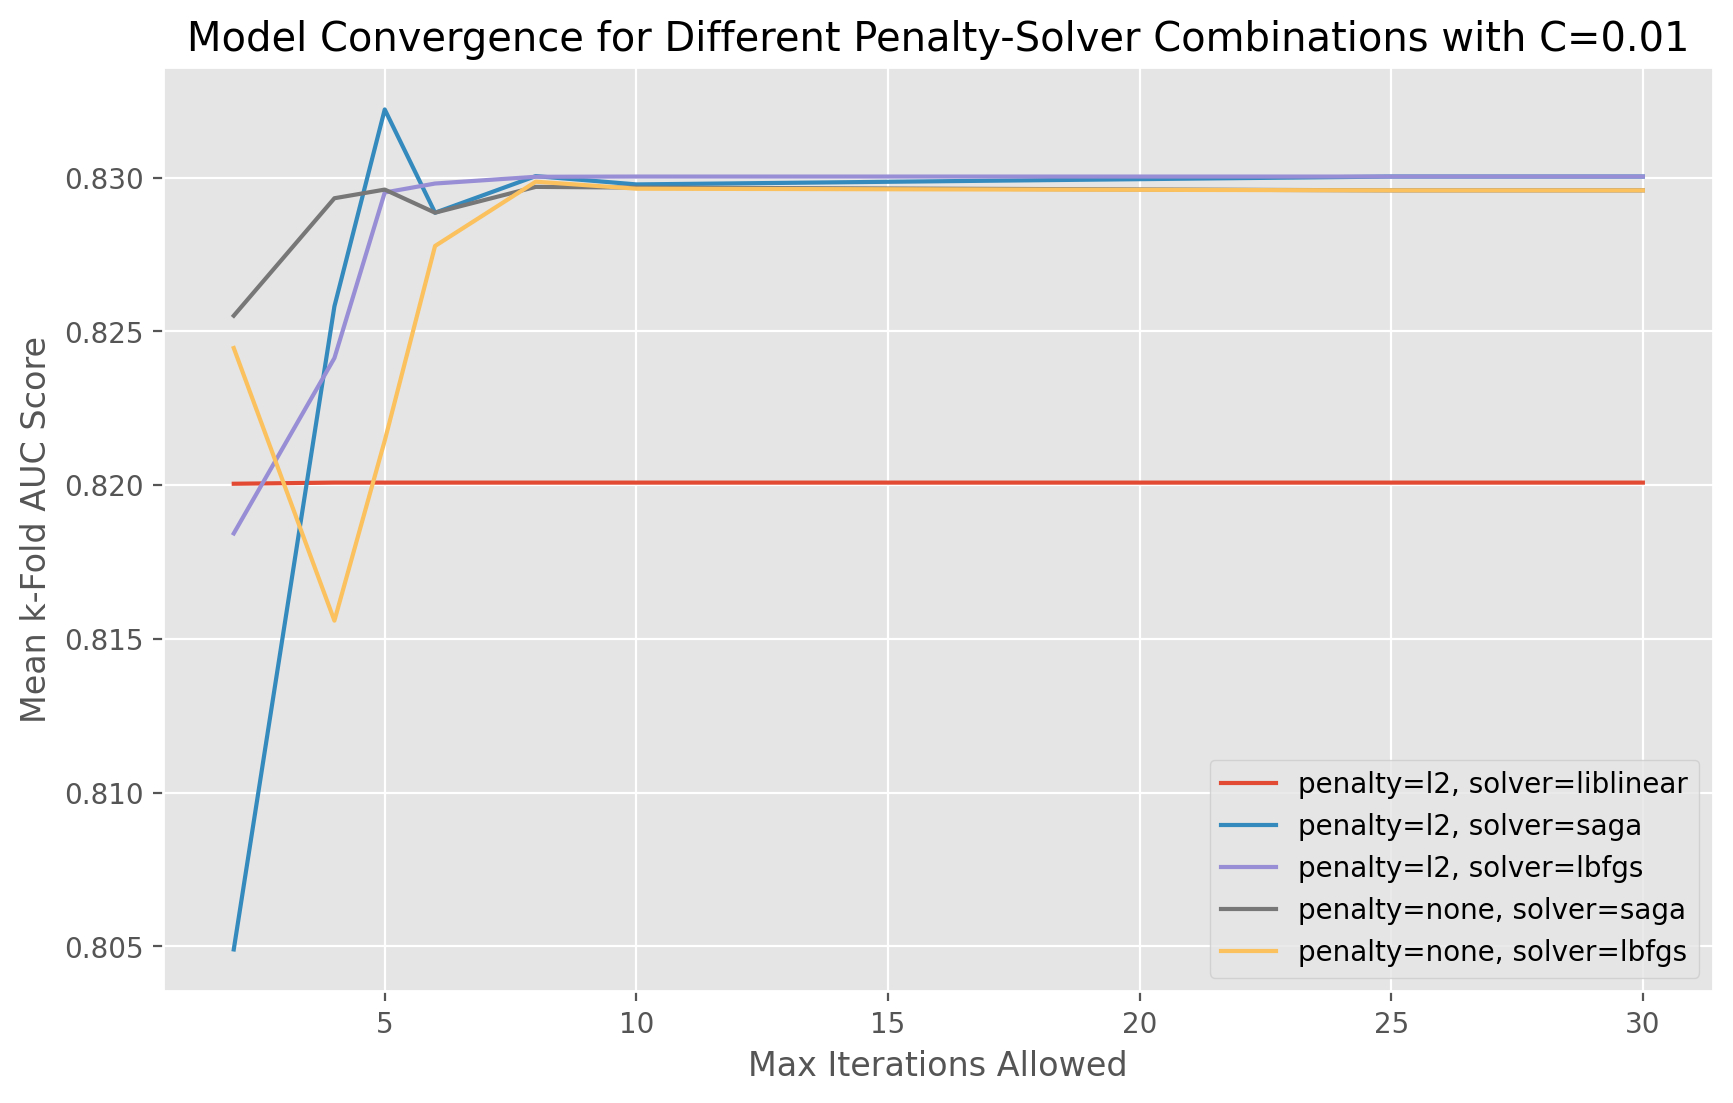

In [19]:
#create a data frame for regression results
results_reg = pd.DataFrame(gs_reg.cv_results_['params'])

#add test scores
results_reg['test_score'] = gs_reg.cv_results_['mean_test_score']

#get rows corresponding with the best parameters apart from max iterations
filtered_reg_results = results_reg[
    (results_reg['class_weight'] == 'balanced') &
    (results_reg['C'] == 0.01) & 
    (results_reg['penalty'] != 'l1') &          #l1 had poor results ~0.62 mean AUC
    (results_reg['test_score'].notnull())       #elasticnet generated NaN scores
]

#drop redundant columns
filtered_reg_results.drop(columns=['C', 'class_weight'], inplace=True)

#pivot data
pivoted = filtered_reg_results.pivot(index='max_iter', 
                                     columns=['penalty', 'solver'], 
                                     values='test_score')

#configure figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#plot each combination of solver and penalty
for col, line in pivoted.items():
    penalty, solver = col
    ax.plot(pivoted.index, line, label=f'penalty={penalty}, solver={solver}')

#labels and title
ax.set_xlabel('Max Iterations Allowed')
ax.set_ylabel('Mean k-Fold AUC Score')
ax.set_title('Model Convergence for Different Penalty-Solver Combinations with C=0.01')

#add and show legend
ax.legend()
plt.show()

There are interesting observations one can make from this visualisation which are not evident from just looking at the best parameters. All solvers converge within 25 iterations, and the saga solver achieves a higher AUC score at 5 iterations than after converging. I theorise that these models are all overfitting on the various sets of training data (during k-fold cross validation), but in the case of the saga model, with 5 max iterations, the maximum iteration restriction is preventing the model from overfitting by preventing it from fully converging on the final coefficient values, resulting in higher cross validation performance. To test this theory, I will save 2 models, one with max_iter=5 and one with a max_iter which allows the model to converge with equal best post-convergence performance. The main takeaway however is that with at least 25 iterations, the safa and lbfgs models perform extremely similarly with or without l2 regularisation. 

In [20]:
#save model for later evaluation
best_reg_post_conv = LogisticRegression(C=0.01, class_weight='balanced', 
                                        max_iter=30, random_state=99,
                                        solver='saga')

#### K Nearest Neighbours

The KNN classifier has 4 hyperparameters which need to be tuned to achieve best model performance. n_neighbours is the number of closest values considered by the algorithm, odd numbers are often preferred as this prevents draws between classes during binary classification, especially when not weighting neighbours by distance. Weights determines whether neighbours are weighted equally or weighted based on their distance from the observation being predicted for. p is a parameter used in the equation for the Minkowski metric which determines how distance between observations is measured. There are 3 algorithms for computing the nearest neighbours, 2 of which (ball_tree and kd_tree) use space partitioning data structures to divide data into regions whereas 'brute' manually computes the distance between each point in the dataset. The space partitioning algorithms are better suited to low-dimensional datasets such as ours, whereas when n_features is roughly higher than 15, brute calculation can be more useful. 

In [21]:
#define set of parameters to trial
param_grid_knn = {
    'n_neighbors': [10, 20, 35, 50, 65, 80, 85, 90, 95, 100, 110, 120, 135, 150, 200],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2] 
}

#initialize classifier
clf_knn = KNeighborsClassifier()

#configure cross validation
cv_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=rand)

#configure the grid search
gs_knn = GridSearchCV(clf_knn, param_grid_knn, cv=cv_knn, 
                        scoring=scoring_metric, n_jobs=-2, verbose=1)

#fit GridSearchCV to the data
gs_knn.fit(D_train, t_train)

#save the best parameters and score
best_params = gs_knn.best_params_
best_score = gs_knn.best_score_

print(f"Best parameters: {best_params}")
print(f"Best {scoring_metric} Score: {best_score:.4f}")

#output the best model for later evaluation
gs_knn.best_estimator_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 65, 'p': 2, 'weights': 'distance'}
Best roc_auc Score: 0.9030


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=65, weights='distance')

In [22]:
#save best model for later comparison
best_knn = KNeighborsClassifier(algorithm='ball_tree', 
                                n_neighbors=65, 
                                weights='distance')

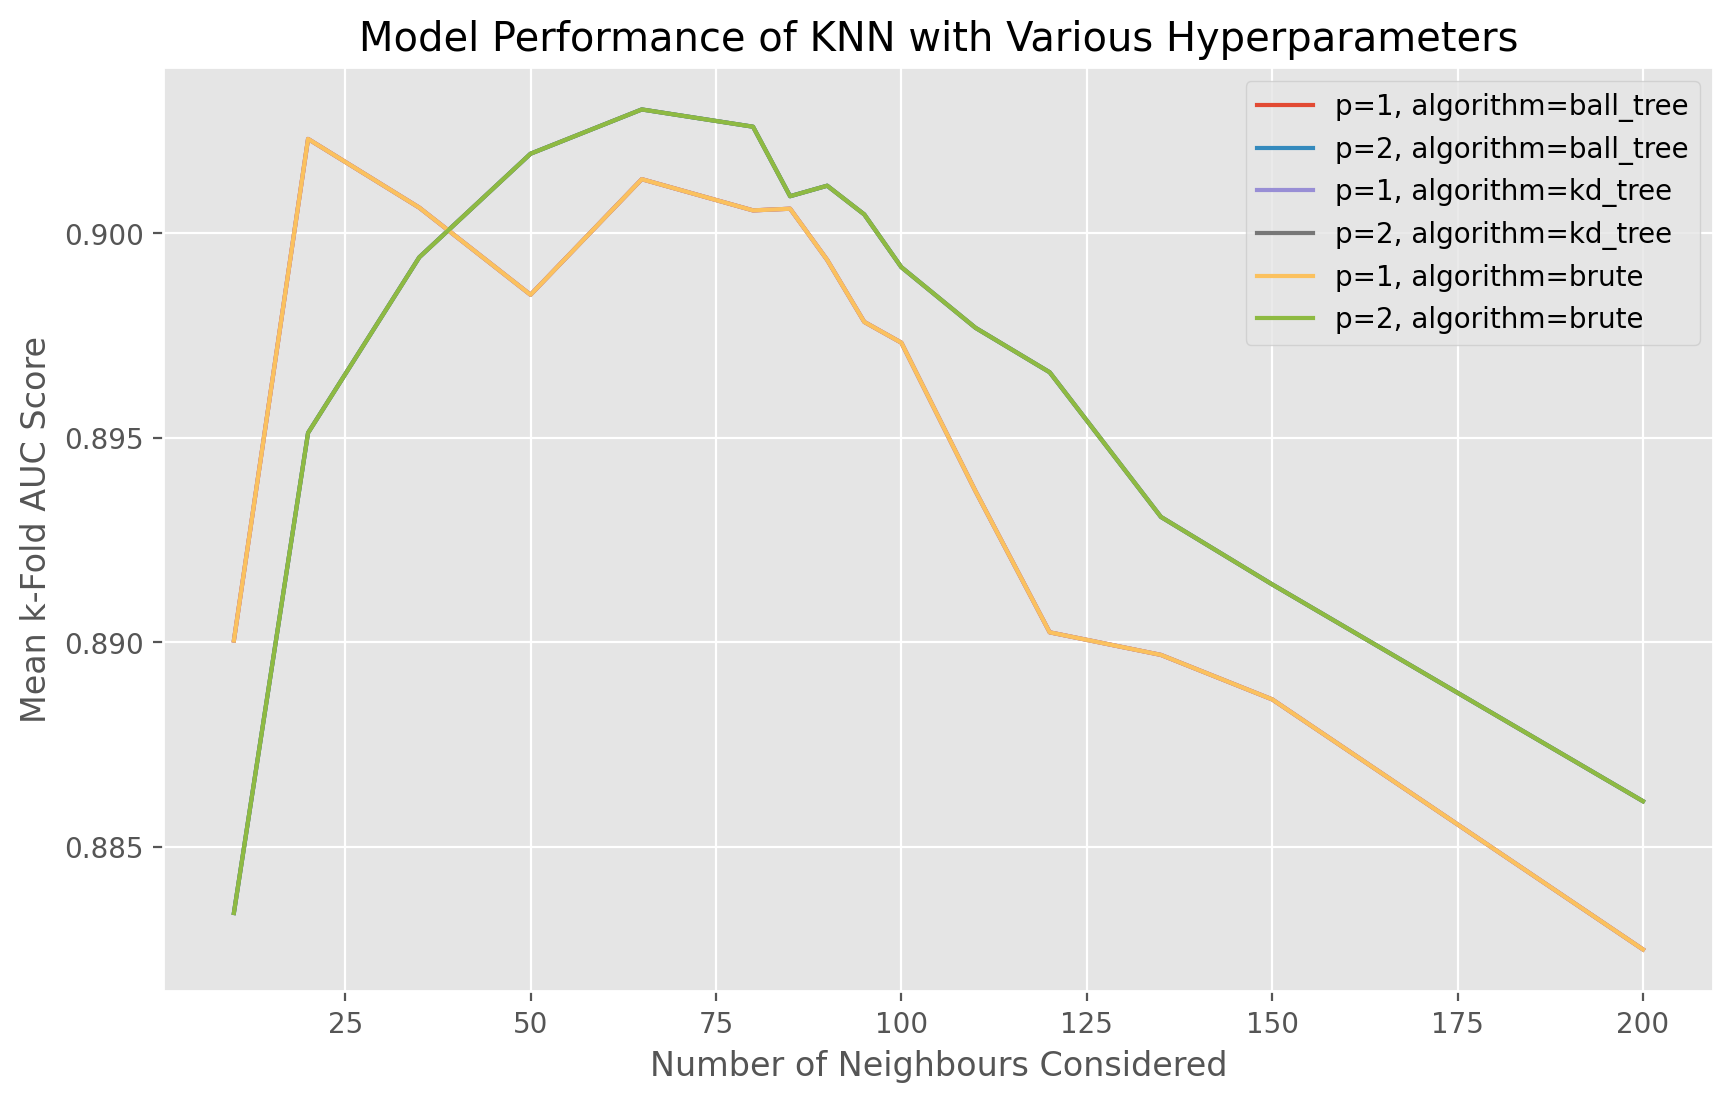

In [23]:
#create a data frame for regression results
results_knn = pd.DataFrame(gs_knn.cv_results_['params'])

#add test scores
results_knn['test_score'] = gs_knn.cv_results_['mean_test_score']

#get rows corresponding with the best weights parameter
results_knn = results_knn[results_knn['weights'] == 'distance']

#drop redundant columns
results_knn.drop(columns=['weights'], inplace=True)

#pivot data
pivoted_knn_results = results_knn.pivot(index='n_neighbors', 
                                     columns=['p', 'algorithm'], 
                                     values='test_score')

#configure figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#plot each combination of metrics
for col, line in pivoted_knn_results.items():
    p, algorithm = col
    ax.plot(pivoted_knn_results.index, line, label=f'p={p}, algorithm={algorithm}')

#labels and title
ax.set_xlabel('Number of Neighbours Considered')
ax.set_ylabel('Mean k-Fold AUC Score')
ax.set_title('Model Performance of KNN with Various Hyperparameters')

#add and show legend
ax.legend()
plt.show()

The chart shows that the different algorithms have identical performance, so we could have utilised the 'auto' algorithm setting, but setting have been maintained to display this learning. What does make a big impact to the performance of the models in the p value: when it is 1 (i.e. Manhattan distance) the models perform better using just 20 neighbours in the k-fold cross validation whereas when it is 2 (i.e. Euclidean distance) we get slightly (insignificantly) better performance using 65 neighbours. As more neighbours reduces the likelihood of overfitting, we will go with Euclidean distance. 

#### Random Forest Classifier

Random Forest classifiers are an ensemble model made up of an array of decision trees. Each decision tree is trained using a random subset of all observations, resulting in trees which utilise different splitting metrics, then observations are fed into every tree and the prediction is based on the majority decision of the decision trees for each observation. Random forests have many parameters which can be tuned, made up of the parameters of the decision trees such as max depth, min samples to split, min samples for a leaf, max features to consider at each split and the criterion to base splitting metric selection on, and also the parameters of the ensemble model such as number of decision trees (n_estimators) and whether bootstrap samples are used when building trees (bootstrap). As with the above examples, I will tune the hyperparameters using the grid search cross validation methodology utilising 5-fold stratified cross validation and area under the ROC curve. Trialling a max depth of None allows the trees to be limited instead by the min sample splits and min samples in a leaf. When a new split is carried out, decision trees can be greedy and consider all the features, or they can select only a portion of the total features to consider, decision trees in random forests do the latter, and the maximum features is determined by the max features parameter that I listed under the decision tree parameters. 

In [24]:
#define set of parameters to trial
param_grid = {
    'n_estimators': [3, 5, 12, 14, 20, 50, 75, 100, 125, 150],
    'max_depth': [9, 10, 11, 13, 15],
    'min_samples_split': [2, 5, 7, 9],
    'min_samples_leaf': [1, 3, 6, 9],
    'criterion': ['gini', 'entropy']
}

#configure cross validation
cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=rand)

clf_rf = RandomForestClassifier(max_features='sqrt', bootstrap=True, random_state=rand)

#configure the grid search
gs_rf = GridSearchCV(clf_rf, param_grid, cv=cv_rf,
                     scoring=scoring_metric, n_jobs=-2, verbose=1)

#fit GridSearchCV to the data
gs_rf.fit(D_train, t_train)

# Get the best parameters and score
best_params = gs_rf.best_params_
best_score = gs_rf.best_score_

print(f"Best parameters: {best_params}")
print(f"Best {scoring_metric} Score: {best_score:.4f}")

#save the best model for later evaluation
gs_rf.best_estimator_

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 75}
Best roc_auc Score: 0.9301


RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=9, n_estimators=75, random_state=99)

In [25]:
best_rf1 = RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=9, n_estimators=75, random_state=99)

In [26]:
#create DataFrame for results
results_rf = pd.DataFrame(gs_rf.cv_results_['params'])

#add test scores
results_rf['test_score'] = gs_rf.cv_results_['mean_test_score']
results_rf['std_test_score'] = gs_rf.cv_results_['std_test_score']

#save max test scores for each combination of n_estimators and criterion
#sort DataFrame by n_estimators, criterion, and test_score in descending order
sorted_rf_results = results_rf.sort_values(by=['n_estimators', 'criterion', 'test_score'], 
                                           ascending=[True, True, False])

#keep only the rows with highest test_score for each unique combination of n_estimators and criterion
filtered_rf_results = sorted_rf_results.drop_duplicates(subset=['n_estimators', 'criterion'], 
                                                        keep='first')

#remove the index
filtered_rf_results.reset_index(drop=True, inplace=True)

#for the sake of scanning the data for potential trends and visualizing what we are working with, 
#   let's look at the DataFrame for a moment
filtered_rf_results

,criterion,max_depth,min_samples_leaf,min_samples_split,n_estimators,test_score,std_test_score
0,entropy,10,9,2,3,0.907756,0.028826
1,gini,9,9,2,3,0.898091,0.020070
2,entropy,10,1,5,5,0.920790,0.018272
3,gini,10,9,2,5,0.919042,0.007564
4,entropy,10,3,9,12,0.928536,0.015526
5,gini,13,3,7,12,0.924634,0.014886
6,entropy,10,3,9,14,0.929536,0.014067
7,gini,13,3,7,14,0.926007,0.014791
8,entropy,10,3,9,20,0.928867,0.013952
9,gini,13,3,7,20,0.926776,0.012284


In [27]:
#save the model with (subjectively) the best balance of high test score, low n_estimators, low test score std
best_rf2 = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=9,
                       min_samples_split=2, n_estimators=5, random_state=99)

It is worth noting that during the development of this notebook, various ranges of values were trialled in the various grid searches. This table in particular was extremely useful for considering all the ranges of parameters being used by models with different n_estimators to ensure that the ranges in the grid search are not prohibiting the models from operating with the highest possible performance. For example, previously to narrowing down the grid search, I was able to use this table to see that no max depths below 9 and no splits above 9 were present, so there was no point including them in the computationally expensive RF grid search. On the other hand some models were using the maximum max depth and min sample leaf values available, so I adjusted the grid search as necessary to ensure these models can find the optimal values. However the dominant theme visible from this tabular visualisation of the highest performing models was that the maximum performance of RF models is very consistent across the range of n_estimator values, suggesting a smaller n_estimators value could be ideal in order to reduce computation time and model complexity, especially if it is found to generalise better. 

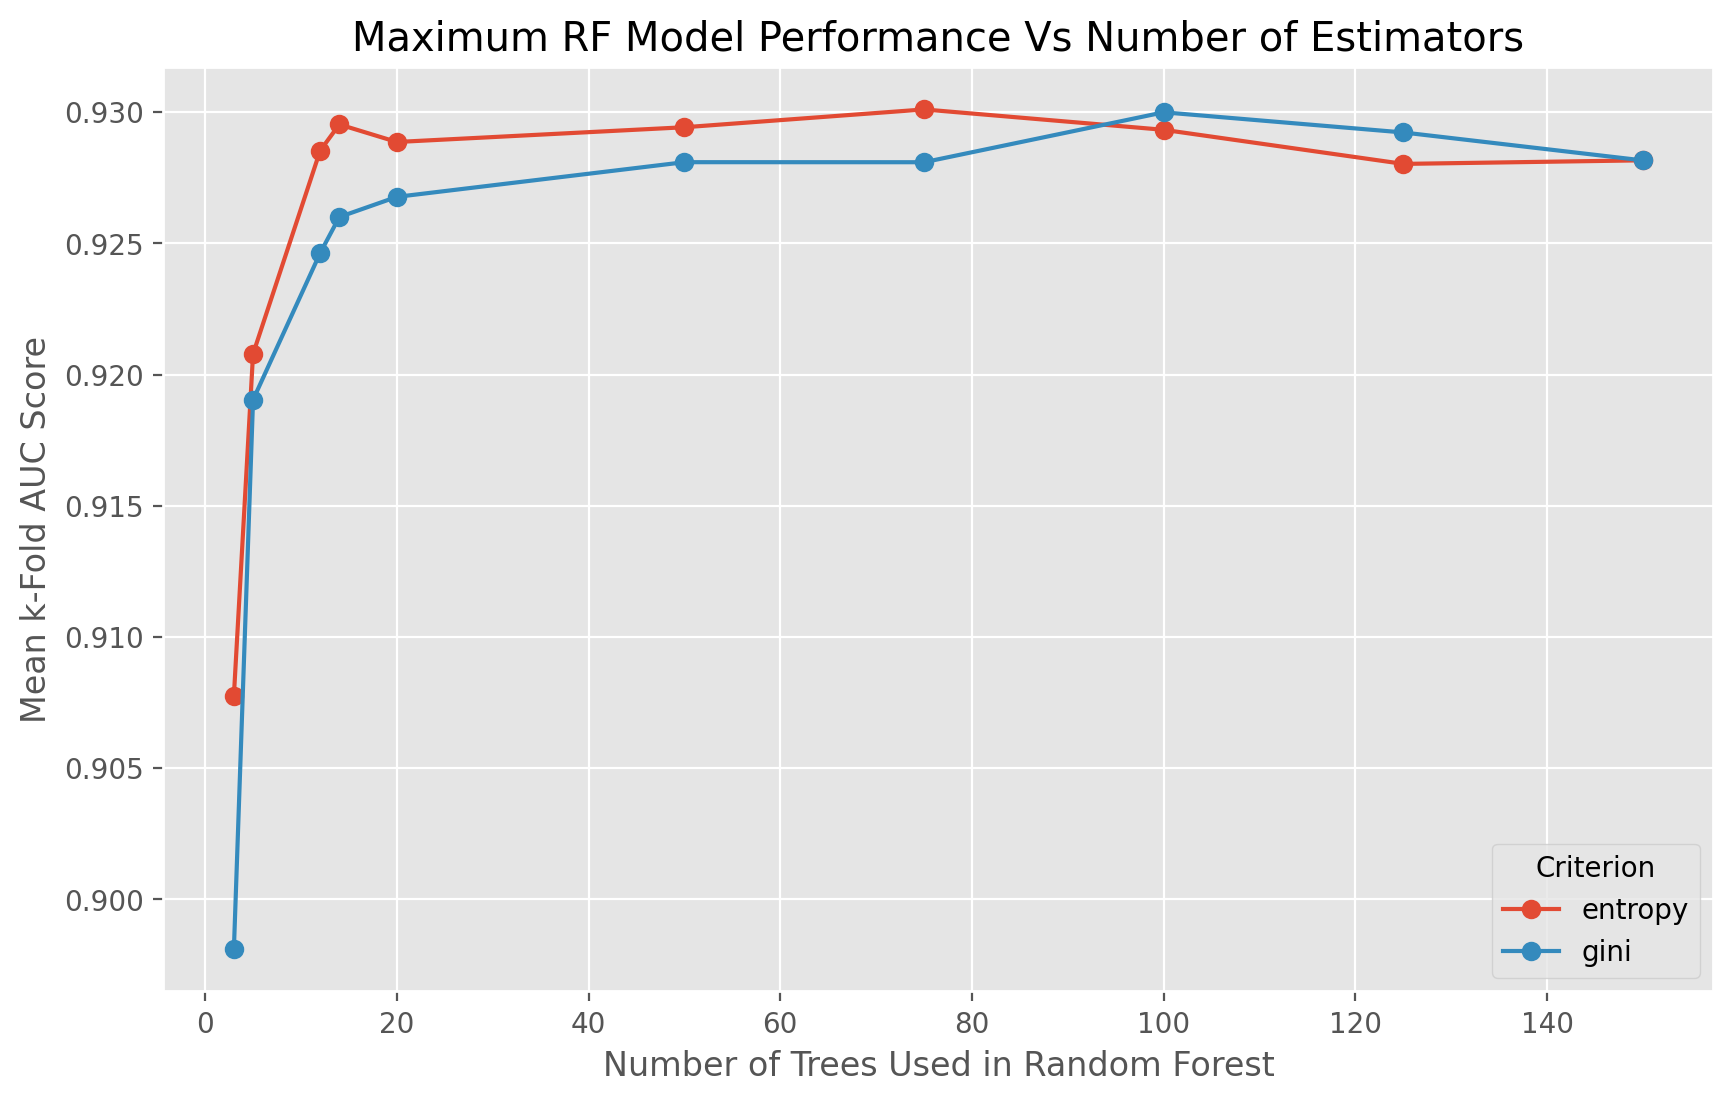

In [28]:
#visualisation of RF parameter tuning
#drop redundant columns
filtered_rf_results.drop(columns=['max_depth', 'min_samples_leaf', 
                                  'min_samples_split'], 
                         inplace=True)

#configure figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#plot
for criterion in filtered_rf_results['criterion'].unique():
    temp = filtered_rf_results[filtered_rf_results['criterion']==criterion]
    ax.plot(temp['n_estimators'], temp['test_score'], marker = 'o', label=criterion)

#labels and title
ax.set_xlabel('Number of Trees Used in Random Forest')
ax.set_ylabel('Mean k-Fold AUC Score')
ax.set_title('Maximum RF Model Performance Vs Number of Estimators')
             
#add and show legend
ax.legend(title='Criterion')
plt.show()

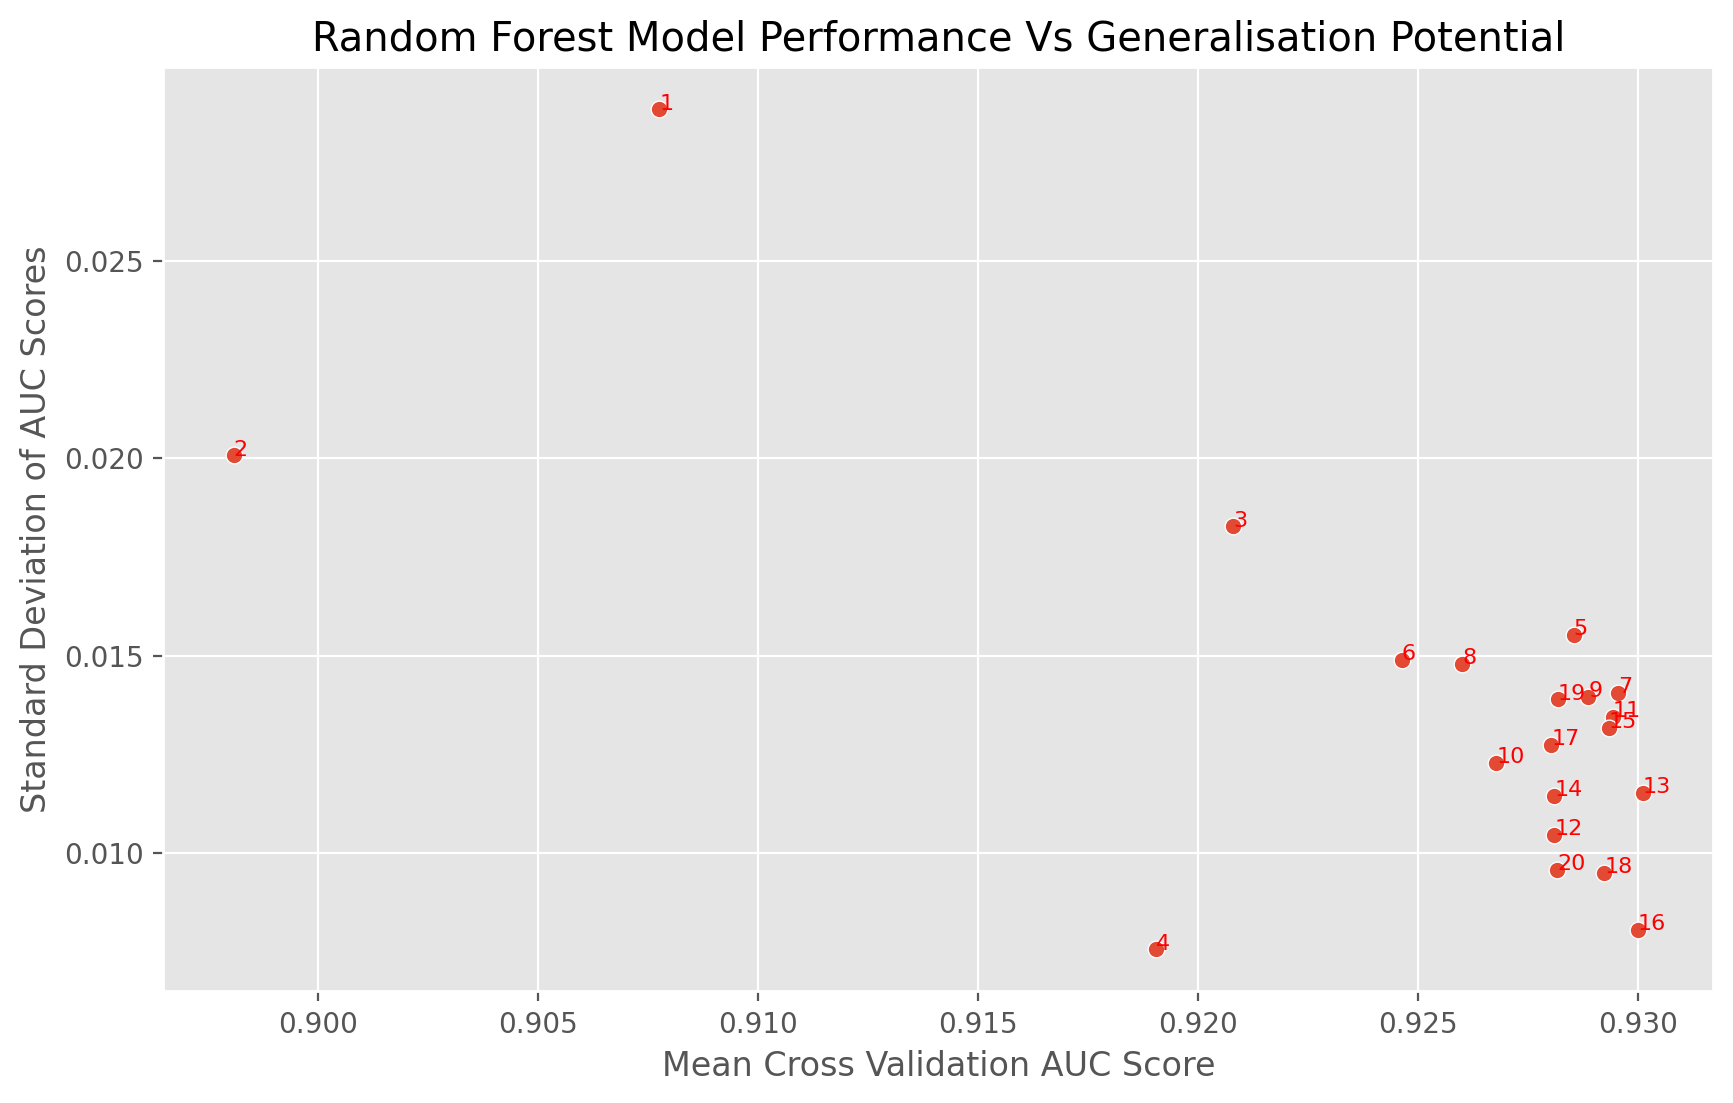

In [29]:
#visualise model performance vs generalisation potential
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_rf_results, x='test_score', y='std_test_score')

#add labels
for i in range(filtered_rf_results.shape[0]):
    plt.text(x=filtered_rf_results.test_score[i], 
             y=filtered_rf_results.std_test_score[i], 
             s=i + 1,  # Labels are reset indices (starting from 1)
             fontdict=dict(color='red', size=8))
    
plt.title('Random Forest Model Performance Vs Generalisation Potential')
plt.xlabel('Mean Cross Validation AUC Score')
plt.ylabel('Standard Deviation of AUC Scores')
plt.show()

In [30]:
best_rf3 = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=7, n_estimators=100, random_state=99)

The model with 5 estimators using gini indices offers the best balance of performance (AUC=0.92) Vs generalisation potential (std_test_score=0.008), computational efficiency/speed and simplicity (less estimators), however the model with 75 estimators using entropy also offers high generalisation potential (std_test_score=0.012) with slightly higher performance (AUC=0.93). Ultimately, if the models are not differentiated by their ability to generalise (we will measure this later using the test data), which model is ideal for production use may depend on how much emphasis the telecom business places on model explainability compared with performance, and the production requirements around speed and computational efficiency. In addition, there is a 3rd model (#16) which based on the above scatterplot, offers practically the same performance as the best model with a lower standard deviation (SD) of cross validation results. All three models substantially exceed the performance of the logistical regression and KNN models experimented with so far, and we will move forward from here by saving all three models for future comparison, for the sake of maximising possible report findings. 

### Neural Network Model Fitting & Tuning

#### Overview of Neural Network Models

Neural networks represent a significant increase in complexity compared to the models used earlier in this project. They have more hyperparameters, require more computational power to train, are less explainable, and generally slower than other models. However, when selected and tuned appropriately, neural networks have the potential to be more accurate. In this section, we will explore how neural networks work, delve into the parameters available for tuning in scikit-learn's MLPClassifier, tune a neural network using grid search and visualize model performance across different hyperparameter values.

A neural network fundamentally consists of layers of nodes (neurons) interconnected through weighted connections. The input layer has one node for each input feature (in our case 6). The output layer has one node for each possible prediction value (in our case 2) and between these layers, there are one or more "hidden layers," each with a variable number of nodes. The connections between nodes are governed by mathematical equations consisting of weights and biases, which are adjusted during training through a process called backpropagation. This adjustment aims to minimize the difference between the network's predictions and the actual target values in the training data.

The scikit-learn library, which we have been using throughout this project, provides two classes for neural networks: MLPRegressor for regression tasks and MLPClassifier for classification tasks (such as ours). MLP stands for Multi-Layer Perceptron. The MLPClassifier can be used for both binary and multiclass classification tasks. It is suitable for classifying a binary target such as churn based on tabular data, as well as other tasks like image and text classification.


#### Hyperparameters of MLPClassifier

Key hyperparameters of the MLPClassifier include hidden layer sizes, activation function, optimization algorithm (solver), L2 penalty (alpha), batch size, learning rate, max_iter, optimization tolerance (tol), and random state.
* Hidden Layer Sizes: This specifies the number of hidden layers and the number of nodes in each layer using a tuple of integers. Increasing the number of nodes and layers makes the model more complex, which can improve performance but also risks overfitting and requires more computational resources. We will experiment with six different hidden layer configurations to explore their performance.
* Activation Functions: The available activation functions include identity, logistic, tanh, and ReLU. The identity function is a linear activation function, which is rarely used in hidden layers as it does not introduce any non-linearity, limiting the network's ability to model complex data. Logistic (sigmoid) and tanh (hyperbolic tangent) functions are useful for shallow networks or binary classification but can suffer from the vanishing gradient problem, which impedes training. ReLU (Rectified Linear Unit) mitigates the vanishing gradient problem and is computationally efficient but can lead to "dying ReLU," where neurons become inactive and stop learning.
* Solver: This parameter specifies the optimization algorithm used for weight updates. Options include lbfgs, sgd, and adam (default). The choice of solver can significantly impact training efficiency and model performance.
* Alpha: This controls the L2 penalty (regularization term) which helps prevent overfitting by discouraging excessively large weights.
* Batch Size: This defines the number of samples per gradient update. Setting it to auto makes it choose the minimum of 200 or the number of samples.
* Learning Rate: This parameter controls how much to change the model in response to the estimated error each time the model weights are updated.
* Max_iter: This sets the maximum number of iterations for the solver to converge. Increasing this can allow the solver more time to find an optimal solution but will increase computation time.
* Tol: This sets the tolerance for the optimization. If the loss does not improve by at least this amount, training will stop.

#### Model tuning

In [31]:
#define set of parameters to trial
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (50, 40, 10), (50, 100, 50), (50, 50, 50, 40, 10)],
    'activation': ['tanh','relu','logistic']
}

#configure cross validation
cv_mlp = StratifiedKFold(n_splits=3, shuffle=True, random_state=rand)

# Initialize the MLP Classifier
clf_mlp = MLPClassifier(random_state=rand, max_iter=400, solver='adam', learning_rate='constant', alpha=0.00001)

# Initialize GridSearchCV with the MLP classifier and parameter grid
gs_mlp = GridSearchCV(clf_mlp, param_grid_mlp, cv=cv_mlp, 
                      scoring=scoring_metric, verbose=1, n_jobs=-2)

# Fit GridSearchCV to the data
gs_mlp.fit(D_train, t_train)

# Get the best parameters and score
best_params = gs_mlp.best_params_
best_score = gs_mlp.best_score_

print(f"Best parameters: {best_params}")
print(f"Best {scoring_metric}  Score: {best_score:.4f}")

#output the best model for later evaluation
gs_mlp.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (50, 40, 10)}
Best roc_auc  Score: 0.9138


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50, 40, 10), max_iter=400,
              random_state=99)

In [32]:
#save best model for later comparison
best_mlp = MLPClassifier(hidden_layer_sizes=(50, 40, 10), 
                         max_iter=400, random_state=99, alpha=0.00001)

In [33]:
#create a data frame for regression results
results_mlp = pd.DataFrame(gs_mlp.cv_results_['params'])

#add test scores
results_mlp['test_score'] = gs_mlp.cv_results_['mean_test_score']

results_mlp['std_test_score'] = gs_mlp.cv_results_['std_test_score']

#convert hidden layer sizes to string values
results_mlp['HLSs_str'] = results_mlp['hidden_layer_sizes'].apply(lambda x: str(x))

# #filter out underperforming alpha values
# results_mlp = results_mlp[(results_mlp['alpha']==0.0001)]

#remove redundant columns
results_mlp.drop(columns=['hidden_layer_sizes'], inplace=True)

#visualise the table so that we can also eyeball the test score StDs
results_mlp

,activation,test_score,std_test_score,HLSs_str
0,tanh,0.827811,0.029104,"(50,)"
1,tanh,0.824170,0.027906,"(100,)"
2,tanh,0.900308,0.005800,"(50, 50)"
3,tanh,0.904650,0.007142,"(50, 40, 10)"
4,tanh,0.900040,0.005607,"(50, 100, 50)"
5,tanh,0.905535,0.005273,"(50, 50, 50, 40, 10)"
6,relu,0.894561,0.014510,"(50,)"
7,relu,0.901155,0.010354,"(100,)"
8,relu,0.906000,0.006447,"(50, 50)"
9,relu,0.913771,0.004569,"(50, 40, 10)"


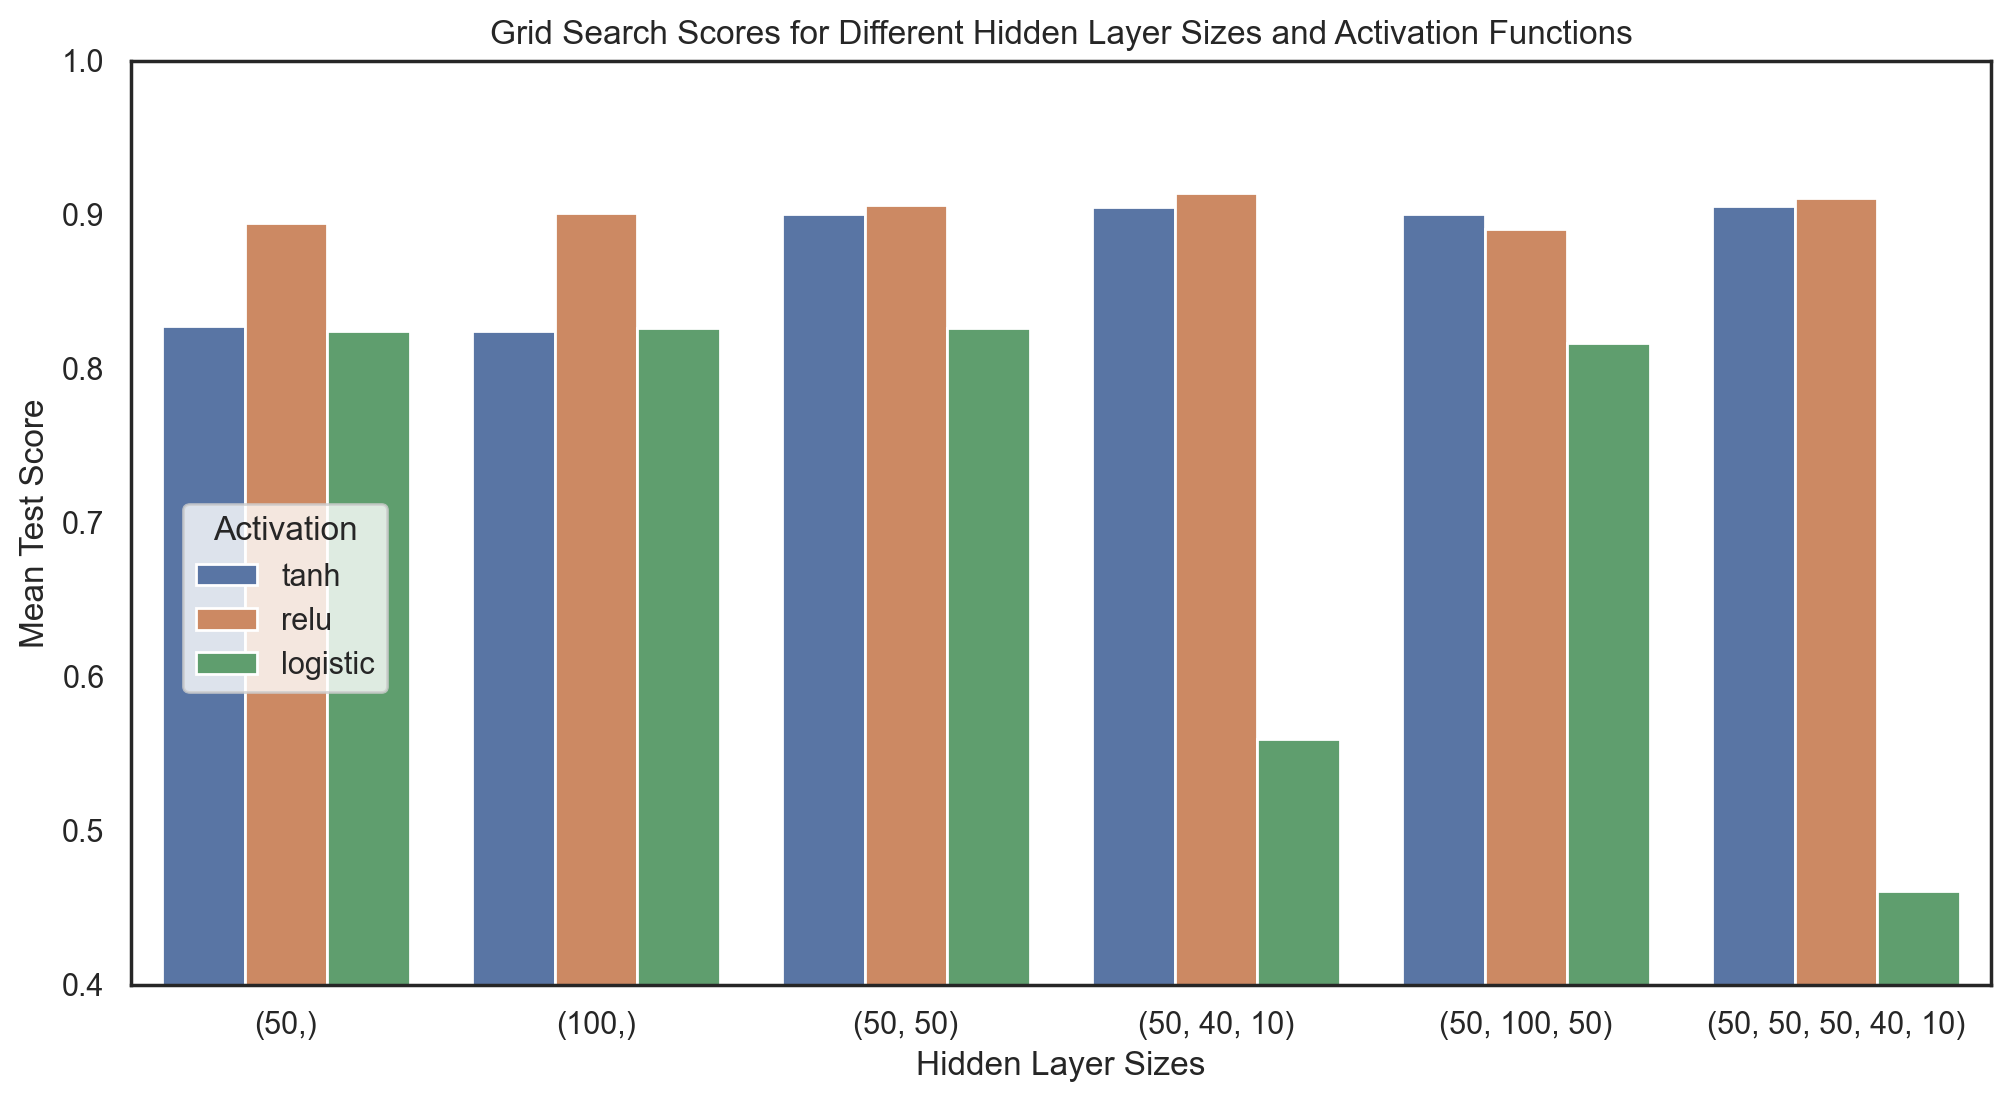

In [34]:
#set seaborn plotting aesthetics
sns.set_theme(style='white')

#create grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='HLSs_str', y='test_score', hue='activation', data=results_mlp)

plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Scores for Different Hidden Layer Sizes and Activation Functions')
plt.ylim(0.4, 1)
plt.legend(title='Activation', bbox_to_anchor=(0.02, 0.3), loc='lower left')
plt.show() 

The plot shows that the MLP classifier mostly achieves between 80 and 95% AUC scores regardless of the hidden layer size, with the tanh activation working better with multiple hidden layers, the logistic activation being sensitive to smaller final hidden layers and the relu activation being both the most consistent across all hidden layer sizes and the overall highest achieving model with an AUC score of 0.91 using the (50, 40, 10) neuron structure. Interestingly this model out-performed both the models which used 100% more neurons with differing shapes. This model also had by far the lowest standard deviation across the 3 folds, indicating that it may generalise better than the other MLP models to unseen data. 

In [35]:
#define set of parameters to trial
param_grid_mlp = {
    'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1],                 #L2 penalty
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Initialize the MLP Classifier
clf_mlp = MLPClassifier(random_state=rand, max_iter=400, solver='adam', activation='relu', hidden_layer_sizes=(50, 40, 10))

# Initialize GridSearchCV with the MLP classifier and parameter grid
gs_mlp = GridSearchCV(clf_mlp, param_grid_mlp, cv=cv_mlp, 
                      scoring=scoring_metric, verbose=1, n_jobs=-2)

# Fit GridSearchCV to the data
gs_mlp.fit(D_train, t_train)

# Get the best parameters and score
best_params = gs_mlp.best_params_
best_score = gs_mlp.best_score_

print(f"Best parameters: {best_params}")
print(f"Best {scoring_metric}  Score: {best_score:.4f}")

#create a data frame for regression results
results_mlp = pd.DataFrame(gs_mlp.cv_results_['params'])

#add test scores
results_mlp['test_score'] = gs_mlp.cv_results_['mean_test_score']

#visualise the table so that we can eyeball the test scores
results_mlp

Fitting 3 folds for each of 21 candidates, totalling 63 fits
Best parameters: {'alpha': 1e-05, 'learning_rate': 'constant'}
Best roc_auc  Score: 0.9138


,alpha,learning_rate,test_score
0,0.000001,constant,0.906883
1,0.000001,invscaling,0.906883
2,0.000001,adaptive,0.906883
3,0.000010,constant,0.913771
4,0.000010,invscaling,0.913771
5,0.000010,adaptive,0.913771
6,0.000100,constant,0.908465
7,0.000100,invscaling,0.908465
8,0.000100,adaptive,0.908465
9,0.001000,constant,0.904914


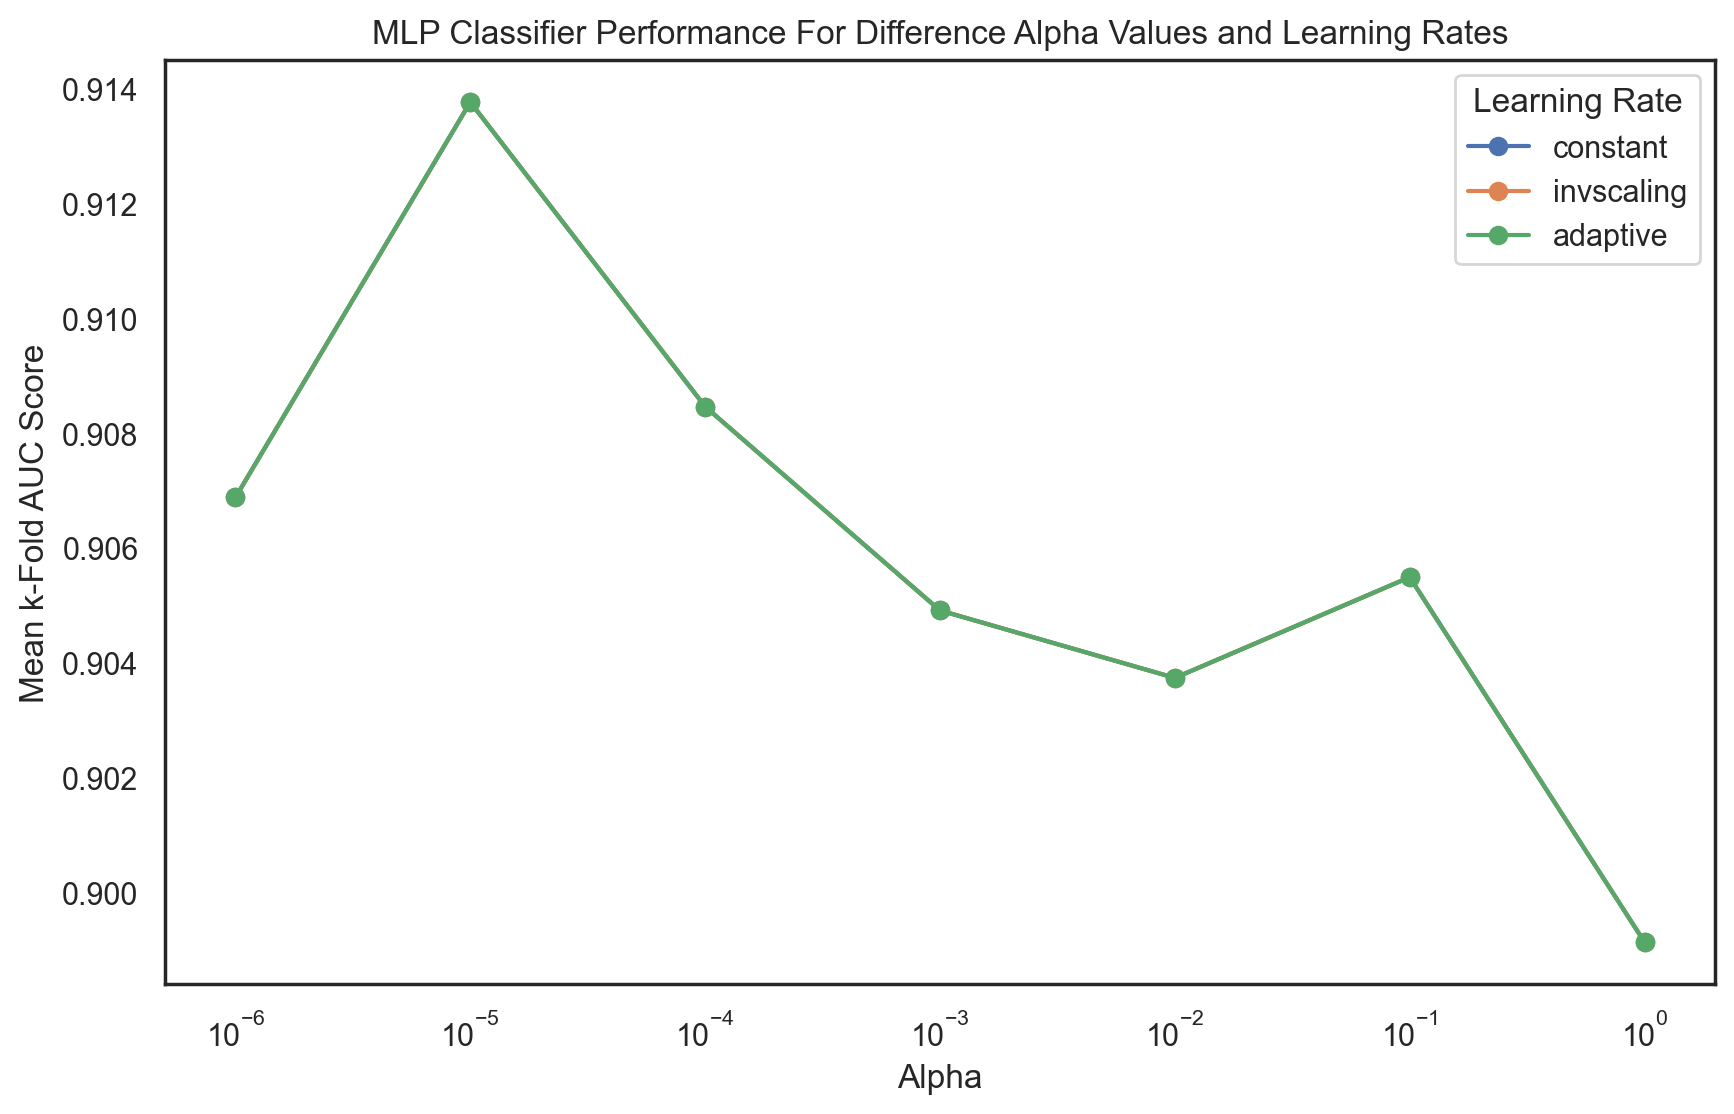

In [36]:
#configure figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#plot
for learning_rate in results_mlp['learning_rate'].unique():
    temp = results_mlp[results_mlp['learning_rate']==learning_rate]
    ax.plot(temp['alpha'], temp['test_score'], marker = 'o', label=learning_rate)

# Set x-axis to log scale
ax.set_xscale('log')

#labels and title
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean k-Fold AUC Score')
ax.set_title('MLP Classifier Performance For Difference Alpha Values and Learning Rates')
             
#add and show legend
ax.legend(title='Learning Rate')
plt.show()

The plot shows that model results are optimised by using a alpha value of 10^-5 which indicates that weak regularisation is necessary for the highest performing model, but regularisation can be too weak. Alpha controls the strength of the regularization during the learning process of an MLP classifier. It is directly proportional to the regularization strength, meaning that a lower value of alpha weakens the regularization, allowing larger weight updates and a potentially less constrained model that can leverage complex relationships in the data but may overfit the training data. By also looking at the data frame used to build the plot, we can see that all of the learning rates resulted in identical model performances. 

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'max_iter': 400, 'solver': 'adam'}
Best roc_auc  Score: 0.9138


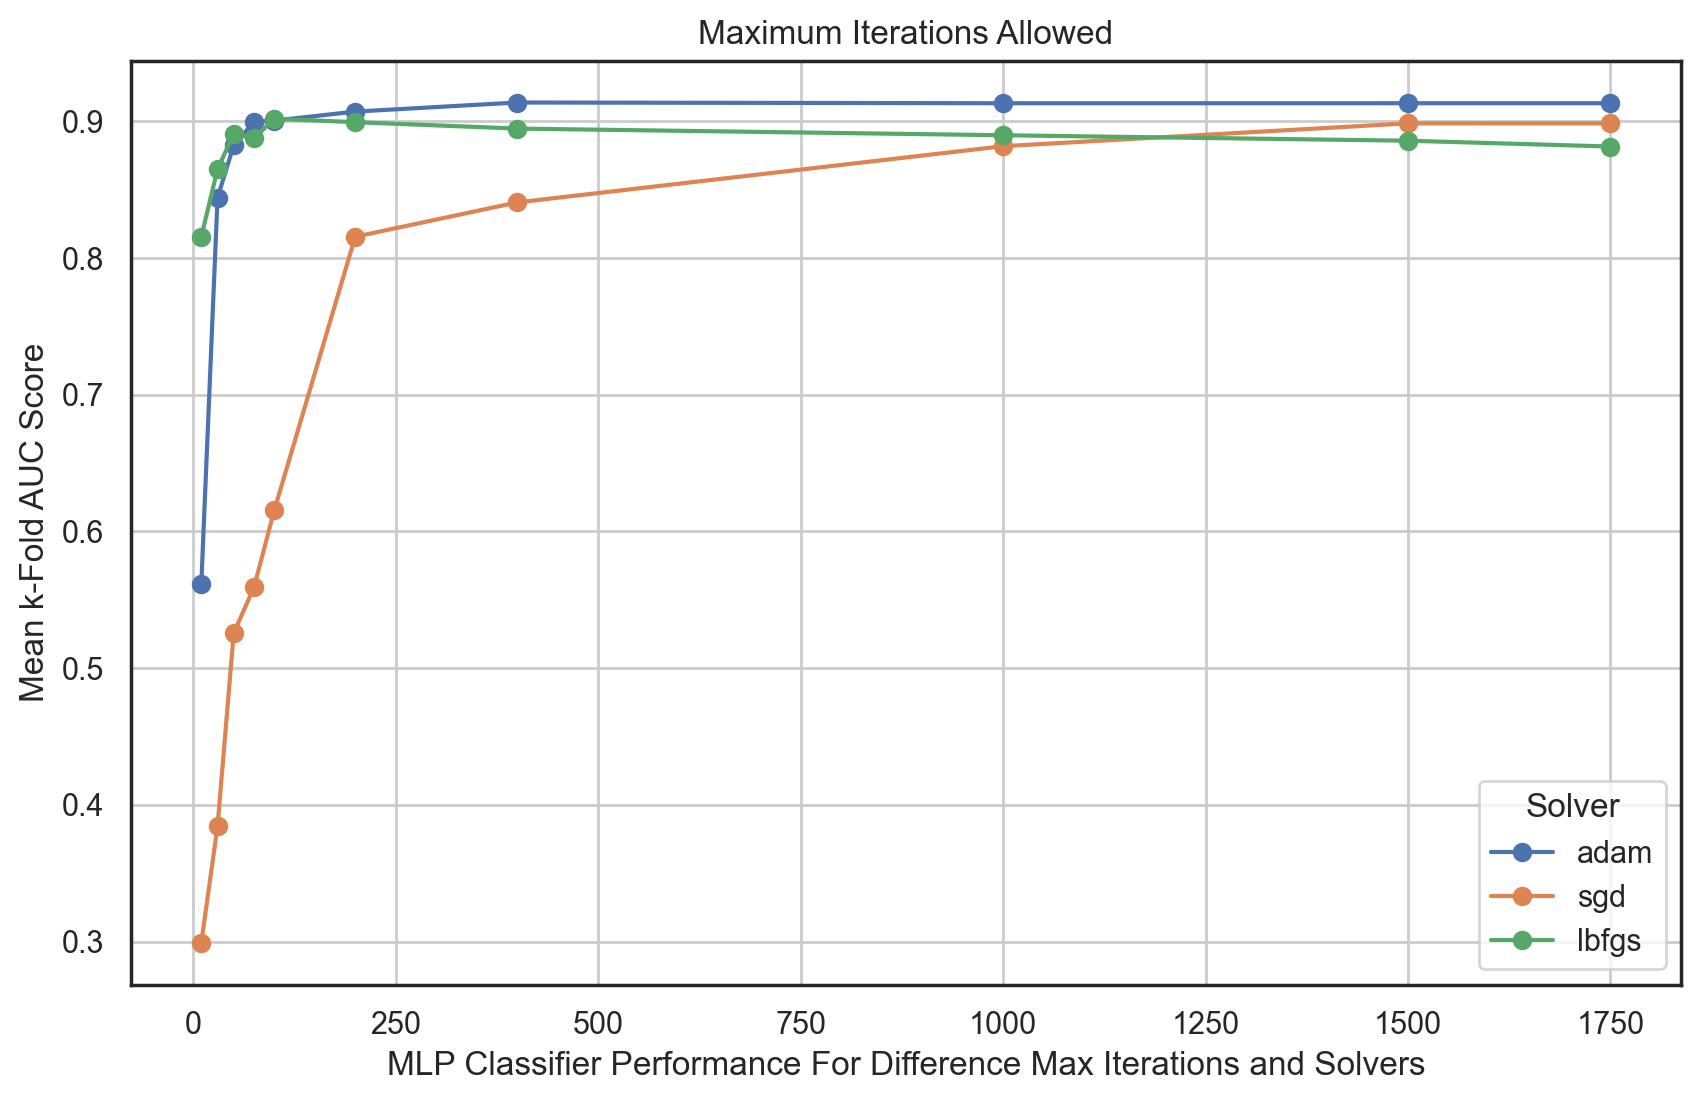

In [37]:
#define set of parameters to trial
param_grid_mlp = {
    'max_iter': [10, 30, 50, 75, 100, 200, 400, 1000, 1500, 1750],
    'solver': ['adam', 'sgd', 'lbfgs']
}

# Initialize the MLP Classifier
clf_mlp = MLPClassifier(random_state=rand, activation='relu', hidden_layer_sizes=(50, 40, 10), alpha=0.00001)

# Initialize GridSearchCV with the MLP classifier and parameter grid
gs_mlp = GridSearchCV(clf_mlp, param_grid_mlp, cv=cv_mlp, 
                      scoring=scoring_metric, verbose=1, n_jobs=-2)

# Fit GridSearchCV to the data
gs_mlp.fit(D_train, t_train)

# Get the best parameters and score
best_params = gs_mlp.best_params_
best_score = gs_mlp.best_score_

print(f"Best parameters: {best_params}")
print(f"Best {scoring_metric}  Score: {best_score:.4f}")

#create a data frame for regression results
results_mlp = pd.DataFrame(gs_mlp.cv_results_['params'])

#add test scores
results_mlp['test_score'] = gs_mlp.cv_results_['mean_test_score']

#configure figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#plot
for solver in results_mlp['solver'].unique():
    temp = results_mlp[results_mlp['solver']==solver]
    ax.plot(temp['max_iter'], temp['test_score'], marker = 'o', label=solver)

#labels and title
ax.set_xlabel('MLP Classifier Performance For Difference Max Iterations and Solvers')
ax.set_ylabel('Mean k-Fold AUC Score')
ax.set_title('Maximum Iterations Allowed')
ax.grid(True)

#add and show legend
ax.legend(title='Solver')
plt.show()

This plot shows us that the solvers all have similar performance given enough iterations, but the sgd solver takes far more (1500) iterations to converge on its optimal solution. The lbfgs solver has higher performance after fewer iterations with performance deteriorating after 250 iterations and the adam solver performs the best with an AUC score of 91.4% after just 400 iterations. 

After 5 hyperparameters have been tuned and plotted, and learning rate has been proven to be unimportant, with 400 max iterations, the adam solver, an alpha of 0.00001, 3 hidden layers with 50, 40 and 10 neurons and the ReLU activation function, we have found the best MLP classifier which has an AUC score of 91.4% using 3-fold stratified CV on the training data. 

### Model Comparison

In the previous sections we have experimented with 4 machine learning algorithms and extracted 6 models with fine tuned parameters, now we will compare them using a more vigorous cross validation methodology in order to determine which is the highest performing and how significant the differences in performance are. 

In [38]:
#create lists of best models for comparison and their names
clf_list = [best_reg_pre_conv, best_reg_post_conv, best_knn, best_rf1, best_rf3, best_rf2, best_mlp]
clf_names = ['logistic_regression_pre-converging', 
             'logistic_regression_post-converging', 
             'knn', 
             'random_forest_best', 
             'random_forest_best_std',
             'random_forest_simple', 
             'MLP_neural_net']

#initiate lists for mean and all cross-val results
clf_full_cv_results = []
clf_mean_cv_results = []

#more vigorous k-fold cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=5,
                                     random_state=rand)

#loop through models saving mean and full results to lists
for clf in clf_list:
    cv_results_full = cross_val_score(  estimator=clf,
                                    X=Data,
                                    y=target, 
                                    cv=cv_method, 
                                    scoring=scoring_metric)
    clf_full_cv_results.append(cv_results_full)
    clf_mean_cv_results.append(cv_results_full.mean().round(3))

#output the mean results
for x in range(0, len(clf_list)):
    print(f'model #{x}:\n{clf_names[x]}\nMean AUC Score: {clf_mean_cv_results[x]}\n')

model #0:
logistic_regression_pre-converging
Mean AUC Score: 0.812

model #1:
logistic_regression_post-converging
Mean AUC Score: 0.812

model #2:
knn
Mean AUC Score: 0.885

model #3:
random_forest_best
Mean AUC Score: 0.906

model #4:
random_forest_best_std
Mean AUC Score: 0.907

model #5:
random_forest_simple
Mean AUC Score: 0.893

model #6:
MLP_neural_net
Mean AUC Score: 0.899



Turns out that the pre and post-convergence logistic regression models have identical performance with a more rigorous CV methodology, the best random forests outperform the simple random forest model by a margin of 1.3% and the neural network by a margin of 0.8%, but are these differences in performance significant, or are they possibly just the result of chance?

In [39]:
ind_max = 3
from scipy import stats
for x in range(0, len(clf_list)): 
    print(f'p value for t test of model {x} Vs model 2')
    print(stats.ttest_rel(clf_full_cv_results[ind_max], clf_full_cv_results[x]).pvalue.round(8))

p value for t test of model 0 Vs model 2
0.0
p value for t test of model 1 Vs model 2
0.0
p value for t test of model 2 Vs model 2
0.0
p value for t test of model 3 Vs model 2
nan
p value for t test of model 4 Vs model 2
0.36560667
p value for t test of model 5 Vs model 2
0.00011983
p value for t test of model 6 Vs model 2
0.00269204


We see above that the differences in AUC performance are extremely unlikely to just be the result of chance (apart from in the case of the 2 highest performing random forests), with the highest p value between the best random forest model and the closest performing model, the neural network, being 0.003, or roughly one in 300. So the best random forest models have a significantly better performance on the training data than any of the other models, but how well do they generalise to the test dataset? This will give us the best indication of which model is likely to perform the best on previously unseen data, such as in a development environment, as well as whether the difference in standard deviation of the results from the best random forest models was a meaningful indication of their ability to generalise to unseen data. 

In [40]:
#initiate lists for test results
clf_test_results = []
clf_test_CMs = []
clf_test_report = []

#train each model on training set, predict for test set and save AUC scores
for clf in clf_list:
    clf.fit(D_train, t_train)
    pred_test = clf.predict(D_test)
    clf_test_results.append(roc_auc_score(t_test,pred_test))
    clf_test_CMs.append(confusion_matrix(t_test,pred_test))
    clf_test_report.append(classification_report(t_test,pred_test))

#output the results
for x in range(0, len(clf_list)):
    print(f'model #{x}:\n{clf_names[x]}\nTest AUC Score: {clf_test_results[x]}\n')

model #0:
logistic_regression_pre-converging
Test AUC Score: 0.5370949473062149

model #1:
logistic_regression_post-converging
Test AUC Score: 0.6243556912570997

model #2:
knn
Test AUC Score: 0.5594159361764995

model #3:
random_forest_best
Test AUC Score: 0.7714796940149052

model #4:
random_forest_best_std
Test AUC Score: 0.7703059850947175

model #5:
random_forest_simple
Test AUC Score: 0.6997890607045537

model #6:
MLP_neural_net
Test AUC Score: 0.696879411668144



Interestingly, when the models are training on the full training dataset and tested on the test set, the differences in performance of the models are generally exaggerated, i.e. the best performing models on the training data using CV (RFs) also generalise the best to the test data. The exception to this trend is the KNN model, which performed better on the training data than the regression models but worse (vs average score of the regression models) on the test data. It is also interesting to note that measuring performance on the test data differentiated the 2 logistic regression models, with the model that was allowed more iterations so that it could converge on its final solution outperforming the pre-convergence model by a significant margin of 9%. In the end, the two best performing random forest models had effectively equal ability to generalise to the test data with the higher SD model actually outperforming by an unsubstantial margin of 0.12%. The overall result of the model comparison is that the best random forest models outperform the other models on the test dataset by at least a margin of 7% with the closest performing model being the MLP classifier. 

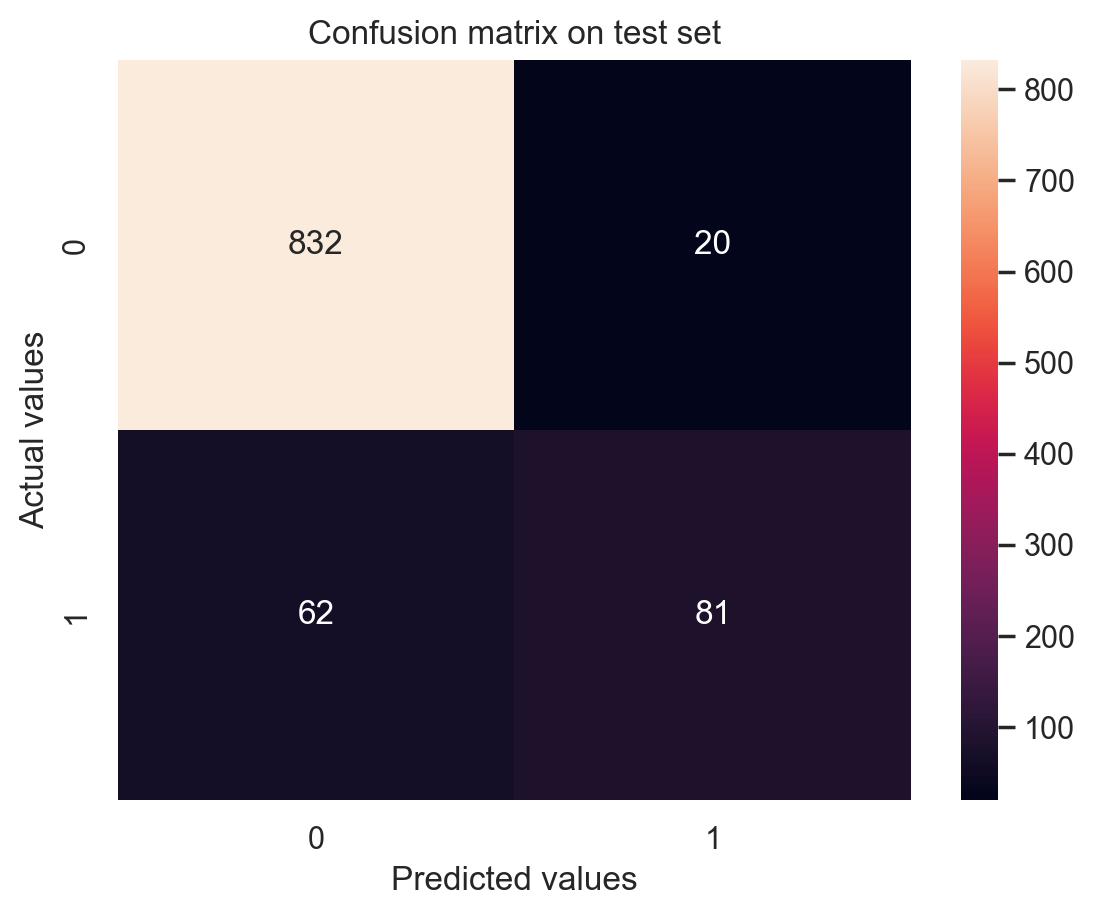

In [41]:
#best RF confusion matrix
ax = sns.heatmap(clf_test_CMs[3], annot=True, fmt='g')
ax.set(xlabel='Predicted values', ylabel='Actual values')
ax.set_title("Confusion matrix on test set")
plt.show()

In [42]:
#best model's classification report
print(clf_test_report[3])

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       852
         1.0       0.80      0.57      0.66       143

    accuracy                           0.92       995
   macro avg       0.87      0.77      0.81       995
weighted avg       0.91      0.92      0.91       995



In [43]:
#lower std rf model's classification report
print(clf_test_report[4])

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       852
         1.0       0.79      0.57      0.66       143

    accuracy                           0.92       995
   macro avg       0.86      0.77      0.81       995
weighted avg       0.91      0.92      0.91       995



In [44]:
#best MLP classifier model's classification report
print(clf_test_report[6])

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       852
         1.0       0.73      0.42      0.53       143

    accuracy                           0.89       995
   macro avg       0.82      0.70      0.74       995
weighted avg       0.88      0.89      0.88       995



In [45]:
#simple RF's classification report
print(clf_test_report[5])

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       852
         1.0       0.73      0.43      0.54       143

    accuracy                           0.89       995
   macro avg       0.82      0.70      0.74       995
weighted avg       0.88      0.89      0.88       995



Although the best model achieved a low recall score relative to its precision, it's recall far outperforms that of other highly performing models (apart from the other almost identically but lower performing random forest), indicating that it will definitely be the ideal model for use in production with the highest AUC score, highest recall and f1 score and the best generalisation to data not seen during the tuning and training processes. 

## Critique & Limitations

In evaluating the approach used in this project, it is essential to recognize both the strengths and limitations inherent in each step of the process. While the overall approach is sound and well-structured, there are areas where improvements could be made or where certain choices may have introduced drawbacks.

#### Strengths

* Consistency and Comparability: The use of a random seed ensures reproducibility of results, which is a fundamental practice in any scientific approach. Defining a single accuracy metric (AUC) from the start also guarantees that all model comparisons are made on a consistent basis, allowing for a fair evaluation of model performance.

* Handling Imbalanced Data: The choice of AUC as the accuracy metric is particularly apt for handling imbalanced data, such as the one used in this project where only 14.4% of customers are churners. AUC's ability to account for both true positive and false positive rates across various thresholds provides a more nuanced measure of performance than single-threshold metrics.

* Feature Scaling: Using a min-max scaler to standardize the data helps in ensuring that all features contribute equally to the model training process, preventing any single feature from disproportionately influencing the results. Retaining the scaling model for future use ensures consistency in predictions on unseen data.

* Feature Selection with Random Forest Importances: The application of random forest feature importances is a well-regarded technique for feature selection due to its ability to capture non-linear relationships and interactions between features. This method provides a clear and interpretable ranking of feature importances.

* Exhaustive Hyperparameter Tuning: The use of grid searches to explore a wide range of model parameters ensures that the models are well-tuned, potentially leading to better performance. The iterative nature of the grid search process, along with extensive visualizations, allows for a deep understanding of how different parameters affect model performance.

#### Limitations


* Feature Selection Methodology: While random forest importances are a strong method for feature selection, they may assign high importances to correlated features and have high sensitivity to hyperparameters. More rigorous comparison and validation of different feature selection methods could result in models with higher performance. The RF and DT models used during feature selection also may have produced a better performing feature set if they were more thoroughly tuned. 

* Scoring Metric: While the primary focus of this project has been on optimizing the area under the ROC curve (AUC), it is important to acknowledge opportunities to specifically enhance the recall of the final model. Recall is a crucial metric in the context of churn prediction which could have significant business implications as it measures the ability of the model to correctly identify churners. Strategies that could be employed to improve recall include tuning the classification threshold, use of a custom F-score with a beta value, recall optimised hyper-parameter tuning or ensemble models which leverage boosting. 

* Scalability of the Approach: The exhaustive grid search process, while thorough, is computationally expensive and may not scale well to larger datasets or more complex models. Alternative methods such as randomized search or Bayesian optimization could offer similar benefits with reduced computational overhead.

* Interpretability of Complex Models: While complex models like neural networks and random forests can capture intricate patterns, they also pose challenges in interpretability. Logistic regression and decision trees, despite being simpler, offer more transparent decision-making processes. Balancing the trade-off between model performance and interpretability is crucial, especially in business applications like churn prediction where understanding the reasoning behind predictions is valuable.

* Visualizations for Model Comparison: While visualizations are extensively used during the tuning process, their role in the final model evaluation and comparison could be more detailed. Clear visual comparisons of model performance across different metrics and datasets (training vs. testing) would provide a more comprehensive evaluation.

In summary, future work could focus on enhancing feature selection methods, prioritising recall over precision, exploring more scalable and interpretable models, utilizing more visualisations to enhance the model comparison process and adopting more robust tests for measuring the significance of differences in results. 

## Summary & Conclusions

### Project Summary

The project began with a literature review on churn prediction in the telecommunication industry, which included a review of related publicly available datasets, and from that, a dataset was selected from a 2012 CrowdAnalytix competition which was available to download from github with 4 columns already removed. Once the data was imported and inspected, phone numbers, area codes and state columns were removed, columns renamed, data types adjusted, missing values were populated or removed and a redundant column was removed. After the data had been cleaned, a wide variety of single and multi-variable plots were used to explore and grasp a thorough understanding of the data. 

The next phase of the project required the dataset be scaled and split into the feature set and target values. Following from that, a feature selection process was used to identify a subset of the features which would produce comparable model performance with a decreased level of complexity. After the number of features had been reduced, the data was split into train and test data and 4 model architectures were tuned on the training data with visualisations utilised to explore, better understand and critique the parameter tuning process. Models selected for comparison of churn prediction included 2 logistic regression models with differing allowed max iterations, a k nearest neighbour model, a simple and a more complex random forest classifier and an MLP classifier neural network. The models were all compared to determine the statistical significance of differences in model performance, and finally, tested on the test dataset. The project was closed out by critiquing the process which had been followed, discussing project limitations and ideas for further study. 

### Summary of Findings

The first findings were made during data preprocessing where it was discovered that the binary feature, voice mail plan, was a derivative of number of voice mails, as there were no customers who had a voice mail plan and no voice mails. Another key finding early in the project was the imbalances present in all 3 binary features, including the target feature which had only 14.4% churners. More findings from the data visualisation stage included that account age was normally distributed, customer service calls is right skewed with many outliers, international calls were distributed similarly regardless of whether customers have an international plan and features which one may expect to have some correlation such as number of day calls compared with number of night calls and number of evening calls compared to sum of evening charges bared no signs of correlation. Some features were determined to have more significance in relation to churn status of the customer such as number of service calls and sum of day charges. 

During feature selection, a decision tree wrapper achieved an AUC score of 88.3% using all features and a 5-fold stratified cross validation (CV) method with 3 repeats, however this was discovered not to be a significantly better performance than the same wrapper could achieve using just the 6 most significant features as selected by random forest importance (RFI). With 6 features the decision tree, with a tuned max depth of 5 achieved 87.4% AUC, using the same CV method, which was also a significantly better result than when using any smaller feature set as defined by RFI. The best 6 features in order of highest to lowest significance were determined to be sum of day charges, number of customer service calls, sum of evening charges, international plan, sum of international charges and number of international calls. 

After extensive exploration of the max allowed iterations parameter, the best performing linear regression model was determined to be a class weight balanced regularised model utilising l2 regularisation with C equal to 0.01 using the saga solver and restricted to just 5 maximum iterations which achieved 83.2% AUC (lower performance than the minimally tuned wrapper). When results leveraging an array of solvers, regularisation penalties and max iteration restrictions were visualised it was evident that after convergence (at least 25 iterations) the saga and lbfgs solvers performed almost identically regardless of whether l2 or no regularisation was used. In order to determine the efficacy of the iteration restricted model, l2 regularised models using the saga solver were saved in each of their pre- and post-convergence states for later comparison.

During the tuning of a K Nearest Neighbours model, distance weighted models were determined to be superior whilst the algorithm used to calculate distance was proved to be completely inconsequential. Manhattan (p = 1) distances optimised performance of models considering a lower number of neighbours whilst Euclidean distance achieved the highest AUC score of 90.3% utilising 65 neighbours. 

Random forests proved to be a more computationally expensive model to tune with many different combinations of n estimator, max depth, min sample split, min sample leaf and splitting criterions producing quite comparable results, and a comprehensive grid search with 8000 fits being required to identify the highest performing models and produce a meaningful plot to compare them. Fortunately, at least using bootstrapping and the square root of number of features for consideration in splits consistently gave the best results so these parameters could be withheld from the grid search. Ultimately, models were determined to have quite comparable performances across a range of estimator numbers and 3 models were selected for later comparison. A model with only 5 estimators using gini index, a max depth of 10, min samples in a leaf of 9 and min samples to split of 2 was selected for its high AUC score at 91.9% and low standard deviation of scores at 0.008 balanced with a low number of estimators making the model more explainable. However, the highest performing random forest was a model with 75 estimators using entropy, max depth of 9, min leaf size of 3 and a min split of 9 with an AUC score of 93.0% and standard deviation of scores of 0.012. A scatterplot was also used to compare the highest scoring models with each number of trees and splitting criterion against the standard deviation (SD) of cross validation results. This plot highlighted a third model with equally high performance to the best model which obtained a lower SD, the significance of which was of interest to the project team, so this model was also saved for later comparison. 

While tuning the MLP classifier it was determined that the default solver, adam, along with a max iterations of 400 consistently produced the best results whilst the learning rate had no impact on model performance. Six hidden layer configurations were tested alongside different activation functions and regularisation strengths, and it was found that three hidden layers with 50, 40 and 10 neurons, the ReLU activation function and an alpha value of 0.00001 provided the best AUC score of 91.4% along with the best SD of 0.001. Note this SD is not comparable with that of other ML algorithms tested as a lower number of folds was utilised in the CV technique for neural networks to save on computation time. Additional findings were that the logistic activation function is sensitive to smaller final hidden layers, significantly underperforming other models when the last hidden layer had only 10 neurons compared with 50 and the ReLU activation function resulted in the most consistent results with tanh activation preferring more than 1 hidden layer. It was also determined that the adam solver was the quickest to converge on the optimal solution as well as producing marginally better performance than the other optimisation algorithms. 

When models were compared using a more rigorous cross validation procedure, the best model was the best random forest with the lower SD achieved 90.7% AUC followed by the other best performing random forest at 90.6% and then the neural network model at 90.1%. The Logistic regression models has equal worst performance with 81.2% mean AUC scores. Training each model on the full raining dataset and evaluating them on the test set further differentiated their performances with the best random forests still being difficult to split at 77 and 77.1%, the neural network achieving 70.5% just marginally higher than the simple random forest model at 70.0%. Interestingly, the pre-convergence regression model generalised substantially worse than the post-convergence model with 53.7% AUC score compared to 62.4%. The KNN model had the worse generalisation to the test data with its performance falling from 88.5% on the training data to 55.9% on the test data. When the results of the best models were further analysed by considering their respective classification reports, the best random forest model became the clear winner by displaying by far the best recall for churners of 57% compared to the MLP classifier's 44%.

### Conclusions

The goal of this project was to use the telecommunication customer churn dataset from to train and test machine learning models, identifying the model with the best capability to predict customers who will churn, based on similar unseen data. Through the processes of tuning and comparing models, making use of a range of hyperparameters, the random forest and neural network models were proven to have the highest performance and generalise the best to unseen data, with the best random forest model standing out as the ideal model due to its superior recall of churners. If one model was to be selected to deploy in a development environment, the random forest with bootstrapping, 75 estimators, max depth of 9, min samples in a leaf of 3, min samples to split of 9 utilising the entropy splitting criterion and square root of max features for splits would be the best choice based on the findings of this project, having achieved 77.1% AUC on the test data and 57% recall of churners. Considering the higher performance of complex models such as the random forests and neural network compared with simpler KNN and regression models, it would be reasonable to conclude that the relationships between churn and the descriptive features in the dataset are complex, yet there is a low level of noise allowing the more complex models to effectively map the meaningful patterns in the data without overfitting. 